In [2]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [3]:
cahps = pd.read_csv('CAHPS_data_20180101-20240401.csv', low_memory =False)
#table = pa.Table.from_pandas(cahps)
#parquet_file_path = "Users\khan2\Downloads\HCAHPS\HCAHPS\2024 Data Update"
#pq.write_table(table,parquet_file_path)
#i dont seem to need it it loads fine when i put low_memory false

In [4]:
cahps.head()

,SURVEY_ID,CLIENT_ID,SERVICE,DISDATE,CLIENT_DESC,GROUPER_1,SEX,AGE_AT_DISCH,RACE,INSURANC,...,I3,I4,I5,I6,N114,SS5,SS131,O2,O3,O4
0,1793037887,1712,PY,NaN,Abington Memorial,Abington,Female,29.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5343067819,1712,OY,NaN,Abington Memorial,Abington,NaN,NaN,White or Caucasian,NaN,...,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5291417966,1712,OY,NaN,Abington Memorial,Abington,NaN,NaN,Black or African American,NaN,...,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5291407751,1712,OY,NaN,Abington Memorial,Abington,NaN,NaN,White or Caucasian,NaN,...,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1493151011,1712,PY,NaN,Abington Memorial,Abington,Male,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#checking for Na's
missing_cahps = cahps.isna().sum
#Printing Count
print(f"{missing_cahps} /n")

<bound method NDFrame._add_numeric_operations.<locals>.sum of          SURVEY_ID  CLIENT_ID  SERVICE  DISDATE  CLIENT_DESC  GROUPER_1  \
0            False      False    False     True        False      False   
1            False      False    False     True        False      False   
2            False      False    False     True        False      False   
3            False      False    False     True        False      False   
4            False      False    False     True        False      False   
...            ...        ...      ...      ...          ...        ...   
1380074      False      False    False    False        False      False   
1380075      False      False    False    False        False      False   
1380076      False      False    False    False        False      False   
1380077      False      False    False    False        False      False   
1380078      False      False    False    False        False      False   

           SEX  AGE_AT_DISCH   RACE  

In [6]:
#Checking data types and column names
frame_types_cahps = cahps.dtypes

#Printing 
print(f"{frame_types_cahps} /n")

SURVEY_ID        int64
CLIENT_ID        int64
SERVICE         object
DISDATE         object
CLIENT_DESC     object
                ...   
SS5            float64
SS131          float64
O2             float64
O3             float64
O4             float64
Length: 92, dtype: object /n


In [7]:
#Checking Dupes for survery_id
column_name = 'SURVEY_ID'
dupes = cahps[cahps.duplicated(subset=[column_name], keep=False)]
#printing dupe
print(dupes)
#no Dupes found within the column each survey is unique

Empty DataFrame
Columns: [SURVEY_ID, CLIENT_ID, SERVICE, DISDATE, CLIENT_DESC, GROUPER_1, SEX, AGE_AT_DISCH, RACE, INSURANC, ZIP_CODE, CMS_1, CMS_2, CMS_3, CMS_37, CMS_37CL, CMS_6, CMS_7, CMS_8, CMS_10, CMS_11, CMS_12, CMS_13, CMS_13CL, CMS_18, CMS_33, CMS_19, CMS_19CL, CMS_20, CMS_21, CMS_21CL, CMS_22, CMS_22CL, CMS_23, CMS_24, CMS_38, CMS_39, CMS_40, CMS_41, CMS_25, CMS_26, CMS_27, CMS_28, CMS_29A, CMS_29B, CMS_29C, CMS_29D, CMS_29E, CMS_30, A1, A3, R1, R2, R3, R4, R5, M2, M3, M4, N1, N2, N3, N4, N5, N6, N30, T1, T3, T5, T7, SS17, V2, V3, P1, P2, P3, P4, P5, D1, D2, D3, I1, I3, I4, I5, I6, N114, SS5, SS131, O2, O3, O4]
Index: []

[0 rows x 92 columns]


In [8]:
#Getting date range to figure out how to group
date_column = 'DISDATE'

#Have to convert disdate to date since its float/str
cahps[date_column] = pd.to_datetime(cahps[date_column])

min_date = cahps[date_column].min()
max_date = cahps[date_column].max()

print("Minimum Date", min_date)
print("Maximum Date", max_date)
#getting range
date_range = max_date - min_date
print("Data range:", date_range)
#something doesnt look right here, looks like a bday instead of discharge date

Minimum Date 1920-11-30 00:00:00
Maximum Date 2024-10-23 00:00:00
Data range: 37948 days 00:00:00


In [9]:
#Showing all locations CLIENT_DESC 
unique_location = cahps['CLIENT_DESC'].unique()
print("unique_location1:")
for location in unique_location:
    print(location)

unique_location1:
Abington Memorial
Landsdale
Thomas Jefferson University Hospital
Methodist
Magee
JUP
Home Care
Einstein Medical Center Philadelphia
MossRehab
Einstein Medical Center Elkins Park
Einstein Community Health Associates
Einstein Medical Center Montgomery
Einstein Physicians Montgomery
Einstein Physicians Philadelphia
Cherry Hill
Stratford
Washington Township
Kennedy Health Alliance
Bucks County
Frankfort
Torresdale
JCP Aria


In [10]:
#Showing grouper location
unique_location = cahps['GROUPER_1'].unique()
print("unique_locations2:")
for location in unique_location:
    print(location)
#one is each separate hospital location this one is grouped by region

unique_locations2:
Abington
Center City
Einstein
New Jersey
Northeast


<function matplotlib.pyplot.show(close=None, block=None)>

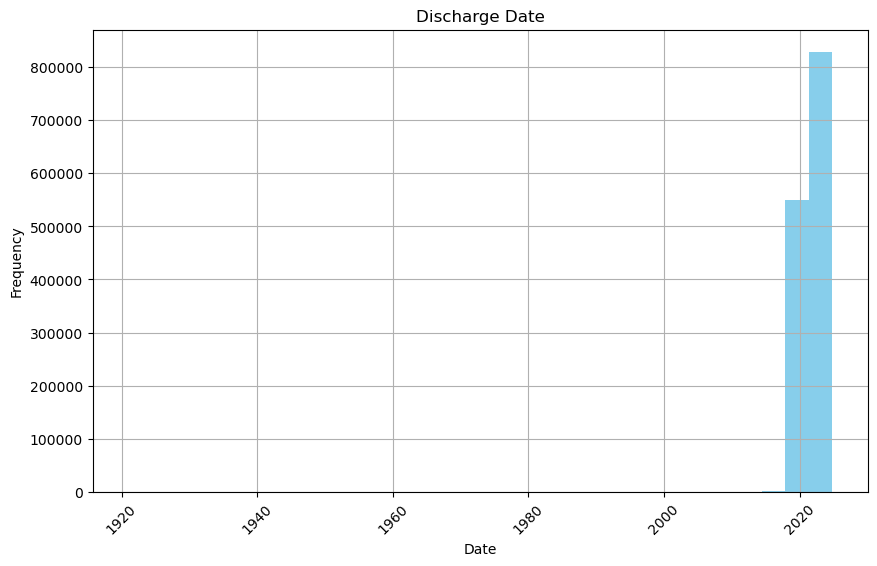

In [11]:
#Doing graph to see all the dates to see if it was outlier or not
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(cahps['DISDATE'], bins=30, color='skyblue')
plt.title('Discharge Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show
#the 1920 date does seem to be an outlier

<function matplotlib.pyplot.show(close=None, block=None)>

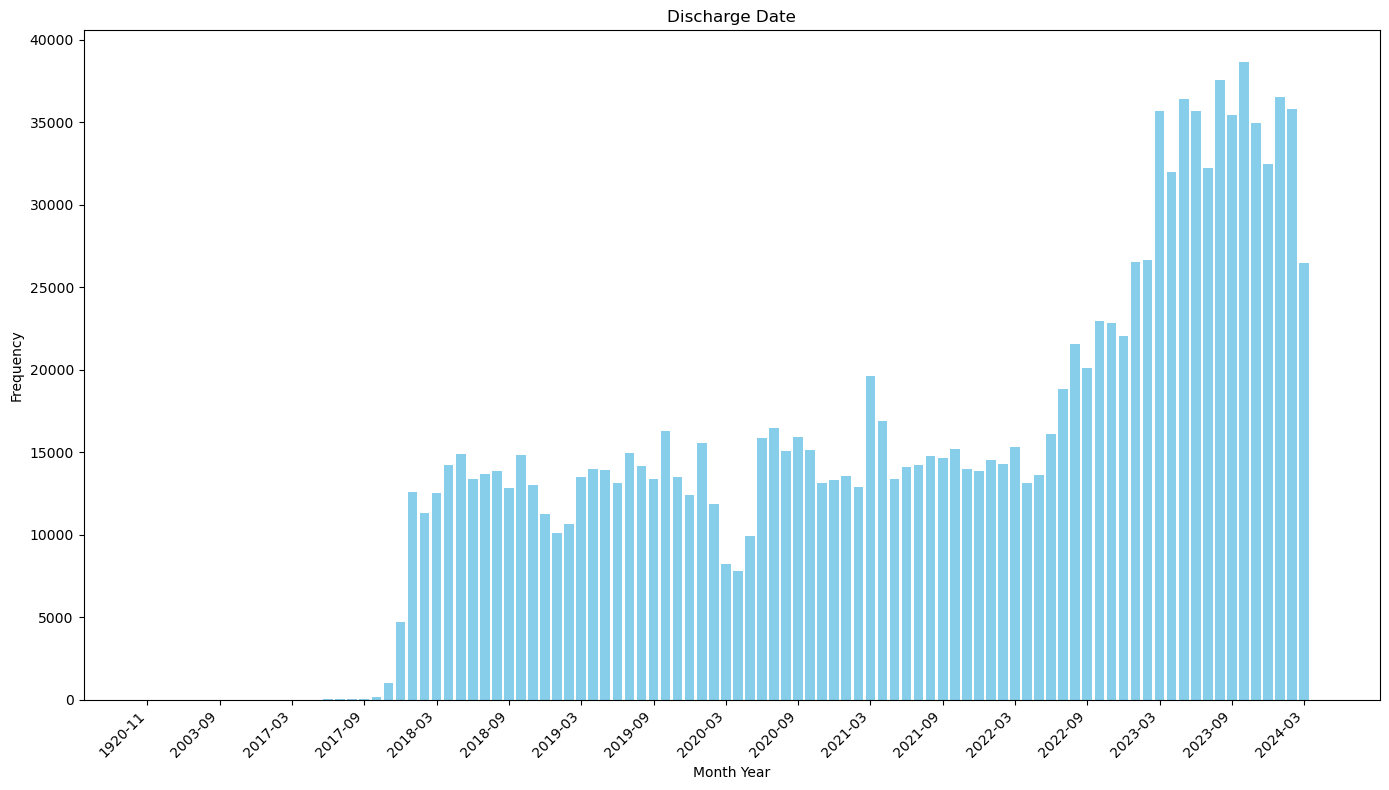

In [12]:
#Changing to months to see it makes a difference. Didnt see the 1940 date
cahps['DISDATE'] = pd.to_datetime(cahps['DISDATE'])
review_counts = cahps.groupby(cahps['DISDATE'].dt.to_period('M')).size().reset_index(name='Counts')

plt.figure(figsize=(14,8))
plt.bar(review_counts['DISDATE'].astype(str), review_counts['Counts'], color ='skyblue')
plt.title('Discharge Date')
plt.xlabel('Month Year')
plt.ylabel('Frequency')
plt.xticks(ticks=range(0, len(review_counts), 6), labels=review_counts['DISDATE'].astype(str)[::6], rotation=45, ha='right')
plt.tight_layout()
plt.show
#looks ok doesnt seem like anything is wrong here
#More reviews did start to show up between april of 2023 to now
#Covid had least reviews

In [13]:
#want to see all column names since i cant and will rename them to understand better
column_names = cahps.columns.tolist()
print("Column Names:")
print(column_names)
#need to clean this to read better


Column Names:
['SURVEY_ID', 'CLIENT_ID', 'SERVICE', 'DISDATE', 'CLIENT_DESC', 'GROUPER_1', 'SEX', 'AGE_AT_DISCH', 'RACE', 'INSURANC', 'ZIP_CODE', 'CMS_1', 'CMS_2', 'CMS_3', 'CMS_37', 'CMS_37CL', 'CMS_6', 'CMS_7', 'CMS_8', 'CMS_10', 'CMS_11', 'CMS_12', 'CMS_13', 'CMS_13CL', 'CMS_18', 'CMS_33', 'CMS_19', 'CMS_19CL', 'CMS_20', 'CMS_21', 'CMS_21CL', 'CMS_22', 'CMS_22CL', 'CMS_23', 'CMS_24', 'CMS_38', 'CMS_39', 'CMS_40', 'CMS_41', 'CMS_25', 'CMS_26', 'CMS_27', 'CMS_28', 'CMS_29A', 'CMS_29B', 'CMS_29C', 'CMS_29D', 'CMS_29E', 'CMS_30', 'A1', 'A3', 'R1', 'R2', 'R3', 'R4', 'R5', 'M2', 'M3', 'M4', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N30', 'T1', 'T3', 'T5', 'T7', 'SS17', 'V2', 'V3', 'P1', 'P2', 'P3', 'P4', 'P5', 'D1', 'D2', 'D3', 'I1', 'I3', 'I4', 'I5', 'I6', 'N114', 'SS5', 'SS131', 'O2', 'O3', 'O4']


In [14]:
#I have a documentation of what is what, I don't think a code will be good enough for it
#Will see how many peolpe were discharged at each year/month
discharge_per_year = cahps.groupby(cahps['DISDATE'].dt.year).size().reset_index(name='Counts')

print("Discharge Per Year:")
print(discharge_per_year)

Discharge Per Year:
    DISDATE  Counts
0    1920.0       1
1    1972.0       1
2    1998.0       1
3    2001.0       2
4    2002.0       1
5    2003.0       1
6    2010.0       1
7    2012.0       1
8    2015.0       1
9    2016.0       1
10   2017.0    6057
11   2018.0  158430
12   2019.0  160003
13   2020.0  158385
14   2021.0  177144
15   2022.0  215523
16   2023.0  404367
17   2024.0   98836


In [15]:
#Now I will see by month

discharges_per_month = cahps.groupby([cahps['DISDATE'].dt.year.rename('Year'), cahps['DISDATE'].dt.month.rename('Month')]).size().reset_index(name='Counts')

print("Discharges per month and year:")
print(discharges_per_month)
#kind of sloppy, I will see specifically year 2020

Discharges per month and year:
      Year  Month  Counts
0   1920.0   11.0       1
1   1972.0    8.0       1
2   1998.0    5.0       1
3   2001.0    7.0       1
4   2001.0   10.0       1
..     ...    ...     ...
93  2023.0   12.0   32484
94  2024.0    1.0   36541
95  2024.0    2.0   35795
96  2024.0    3.0   26499
97  2024.0   10.0       1

[98 rows x 3 columns]


In [16]:
cahps_2020 = cahps[cahps['DISDATE'].dt.year == 2020]

#Group by month and count the number of discharges
discharges_per_month_2020 = cahps_2020.groupby(cahps_2020['DISDATE'].dt.month).size().reset_index(name='Counts')
discharges_per_month_2020.columns = ['Month', 'Counts']

print("Discharges per month in 2020:")
print(discharges_per_month_2020)
#It did slow down in 2020, kind of weird. Would think there is a lot more

Discharges per month in 2020:
    Month  Counts
0       1   15556
1       2   11861
2       3    8224
3       4    7802
4       5    9943
5       6   15886
6       7   16475
7       8   15097
8       9   15926
9      10   15126
10     11   13144
11     12   13345


In [17]:
#Mean of age
columns_of_interest = ['AGE_AT_DISCH']
means_subset = cahps[columns_of_interest].mean()

print("Mean for selected columns:")
print(means_subset)

Mean for selected columns:
AGE_AT_DISCH    61.81723
dtype: float64


In [18]:
#Looking at range of ages
oldest_age = cahps['AGE_AT_DISCH'].max()

youngest_age = cahps['AGE_AT_DISCH'].min()

print(f"The oldest age is: {oldest_age}")
print(f"The youngest age is: {youngest_age}")
#Something doesnt seem right

The oldest age is: 2541.0
The youngest age is: 0.0


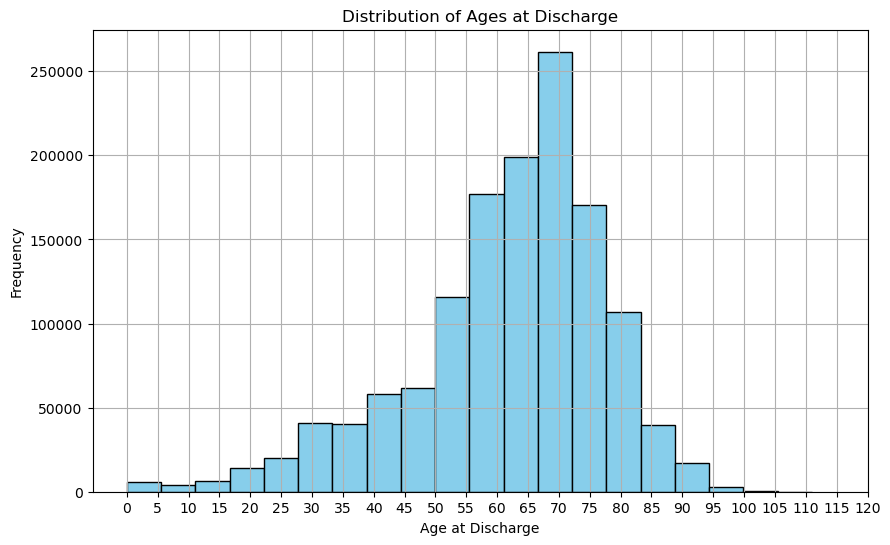

In [19]:
#Showing graph to get better idea of age
#Converting the 'AGE_AT_DISCH' column to numeric
cahps['AGE_AT_DISCH'] = pd.to_numeric(cahps['AGE_AT_DISCH'], errors='coerce')

filtered_ages = cahps[(cahps['AGE_AT_DISCH'] >= 0) & (cahps['AGE_AT_DISCH'] <= 120)]['AGE_AT_DISCH']

#Ploting graph
plt.figure(figsize=(10, 6))
plt.hist(filtered_ages.dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages at Discharge')
plt.xlabel('Age at Discharge')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(0, 121, 5)) 
plt.show()


In [20]:
#Want to see more patient demographic
race_counts = cahps['RACE'].value_counts()

#Printing count
print("Count of each race:")
print(race_counts)
#Majority of the race seems to be white will graph it to show it better

Count of each race:
RACE
White or Caucasian                                   735992
Black or African American                            192857
White                                                111190
W                                                     87721
Caucasian                                             52191
                                                      ...  
HispanicWhite or CaucasianLatino                          1
AsianJapanese                                             1
White or CaucasianChineseOther Pacific Islander           1
White or CaucasianBlack or African AmericanLatino         1
AsianVietnamese                                           1
Name: count, Length: 157, dtype: int64


In [21]:
#There was a question asking for each individual race will run code for that
count1 = cahps['CMS_29A'].value_counts()

print("Count of White Race:")
print(count1)


Count of White Race:
CMS_29A
Yes    68192
No     21129
Name: count, dtype: int64


In [22]:
count2 = cahps['CMS_29B'].value_counts()

print("Count of Black Race:")
print(count2)


Count of Black Race:
CMS_29B
No     79089
Yes    10008
Name: count, dtype: int64


In [23]:
count3 = cahps['CMS_29C'].value_counts()

print("Count of Asian Race:")
print(count3)


Count of Asian Race:
CMS_29C
No     85531
Yes     2703
Name: count, dtype: int64


In [24]:
count4 = cahps['CMS_29D'].value_counts()

print("Count of Hawaiian or PI Race:")
print(count4)


Count of Hawaiian or PI Race:
CMS_29D
No     87820
Yes      288
Name: count, dtype: int64


In [25]:
count5 = cahps['CMS_29E'].value_counts()

print("Count of Native American or Alaskan Race:")
print(count5)


Count of Native American or Alaskan Race:
CMS_29E
No     86790
Yes      810
Name: count, dtype: int64


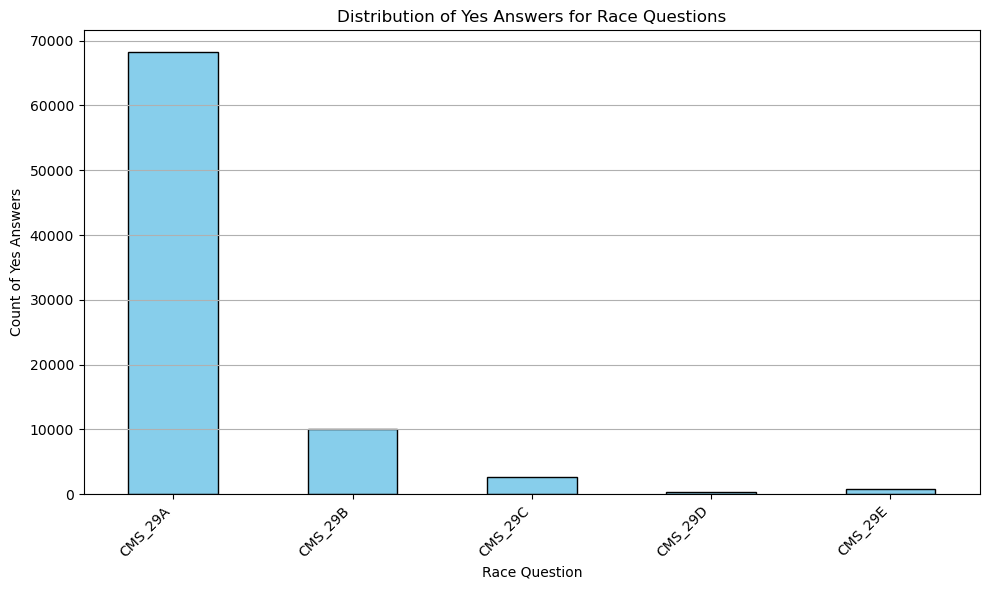

In [26]:
#Graphing race
race = ['CMS_29A', 'CMS_29B', 'CMS_29C', 'CMS_29D', 'CMS_29E']

#Filter the data to include only "yes" answers
filtered_data = cahps[race] == 'Yes'

#Count the "yes" answers for each column
yes_counts = filtered_data.sum()


plt.figure(figsize=(10, 6))
yes_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Yes Answers for Race Questions')
plt.xlabel('Race Question')
plt.ylabel('Count of Yes Answers')
plt.xticks(rotation=45, ha='right')  #Rotate labels
plt.grid(axis='y')  #Add gridlines
plt.tight_layout()
plt.show()

In [27]:
#Putting it all together
race_mapping = {
    'White or Caucasian': 'White or Caucasian',
    'Caucasian': 'White or Caucasian',
    'W': 'White or Caucasian',
    'White': 'White or Caucasian'
}

#Replace values in the 'RACE' column 
cahps['RACE'] = cahps['RACE'].replace(race_mapping)

#Count the occurrences of each race category after remapping
race_counts = cahps['RACE'].value_counts()

#Print the updated counts of each race category
print("Updated count of each race:")
print(race_counts)


Updated count of each race:
RACE
White or Caucasian                                   987094
Black or African American                            192857
Unknown                                               25002
Hispanic                                              24304
Asian                                                 22188
                                                      ...  
AsianJapanese                                             1
White or CaucasianChineseOther Pacific Islander           1
White or CaucasianBlack or African AmericanLatino         1
IndianAsian                                               1
HispanicBlack or African American                         1
Name: count, Length: 154, dtype: int64


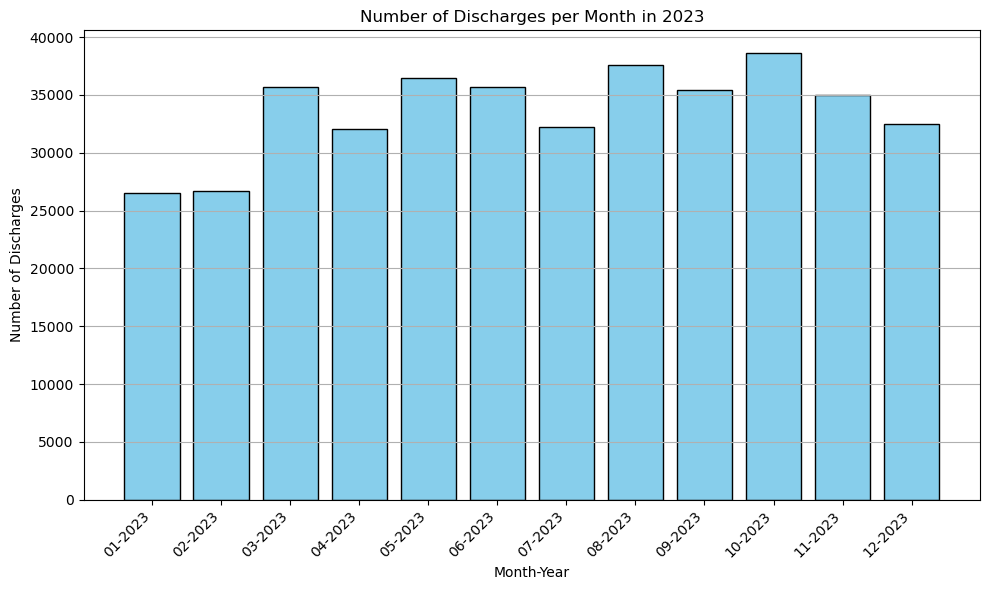

In [28]:
#Seeing Number of discharges in last year
cahps_2023 = cahps[cahps['DISDATE'].dt.year == 2023]

#Group by month and count the number of discharges
discharges_per_month_2023 = cahps_2023.groupby(cahps_2023['DISDATE'].dt.month).size().reset_index(name='Counts')
discharges_per_month_2023.columns = ['Month', 'Counts']

#Create a 'Month-Year' column for better labeling
discharges_per_month_2023['Month-Year'] = discharges_per_month_2023['Month'].astype(str).str.zfill(2) + '-2023'

#Graph
plt.figure(figsize=(10, 6))
plt.bar(discharges_per_month_2023['Month-Year'], discharges_per_month_2023['Counts'], color='skyblue', edgecolor='black')
plt.title('Number of Discharges per Month in 2023')
plt.xlabel('Month-Year')
plt.ylabel('Number of Discharges')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

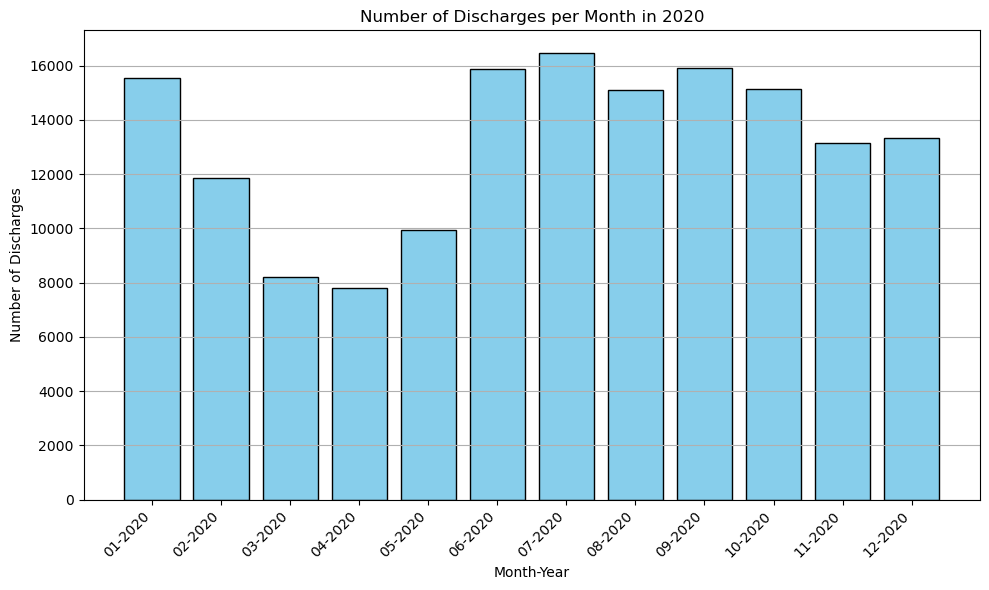

In [29]:
#looking at 2020 as well 
cahps_2020 = cahps[cahps['DISDATE'].dt.year == 2020]

# Group by month and count the number of discharges
discharges_per_month_2020 = cahps_2020.groupby(cahps_2020['DISDATE'].dt.month).size().reset_index(name='Counts')
discharges_per_month_2020.columns = ['Month', 'Counts']

#Create a 'Month-Year' column for 2020 for better labeling
discharges_per_month_2020['Month-Year'] = discharges_per_month_2020['Month'].astype(str).str.zfill(2) + '-2020'

plt.figure(figsize=(10, 6))
plt.bar(discharges_per_month_2020['Month-Year'], discharges_per_month_2020['Counts'], color='skyblue', edgecolor='black')
plt.title('Number of Discharges per Month in 2020')
plt.xlabel('Month-Year')
plt.ylabel('Number of Discharges')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
#We can see a huge drop in March. Must be due to employees being overworked and hospital being overcrowded to take reviews at that time

In [30]:
#This column is overall Hospital Stay Score 0-10
cahps['CMS_23'] = pd.to_numeric(cahps['CMS_23'], errors='coerce')

# Calculate the mean of the 'CMS_23' column, ignoring NaNs
mean_cms_23 = cahps['CMS_23'].mean()

# Print the mean
print("Mean of CMS_23 column:", mean_cms_23)
#Just under an 8 overall score from the past years, not too bad

Mean of CMS_23 column: 7.627165179472685


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3027816096.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cahps['Year'] = filtered_cahps['DISDATE'].dt.year


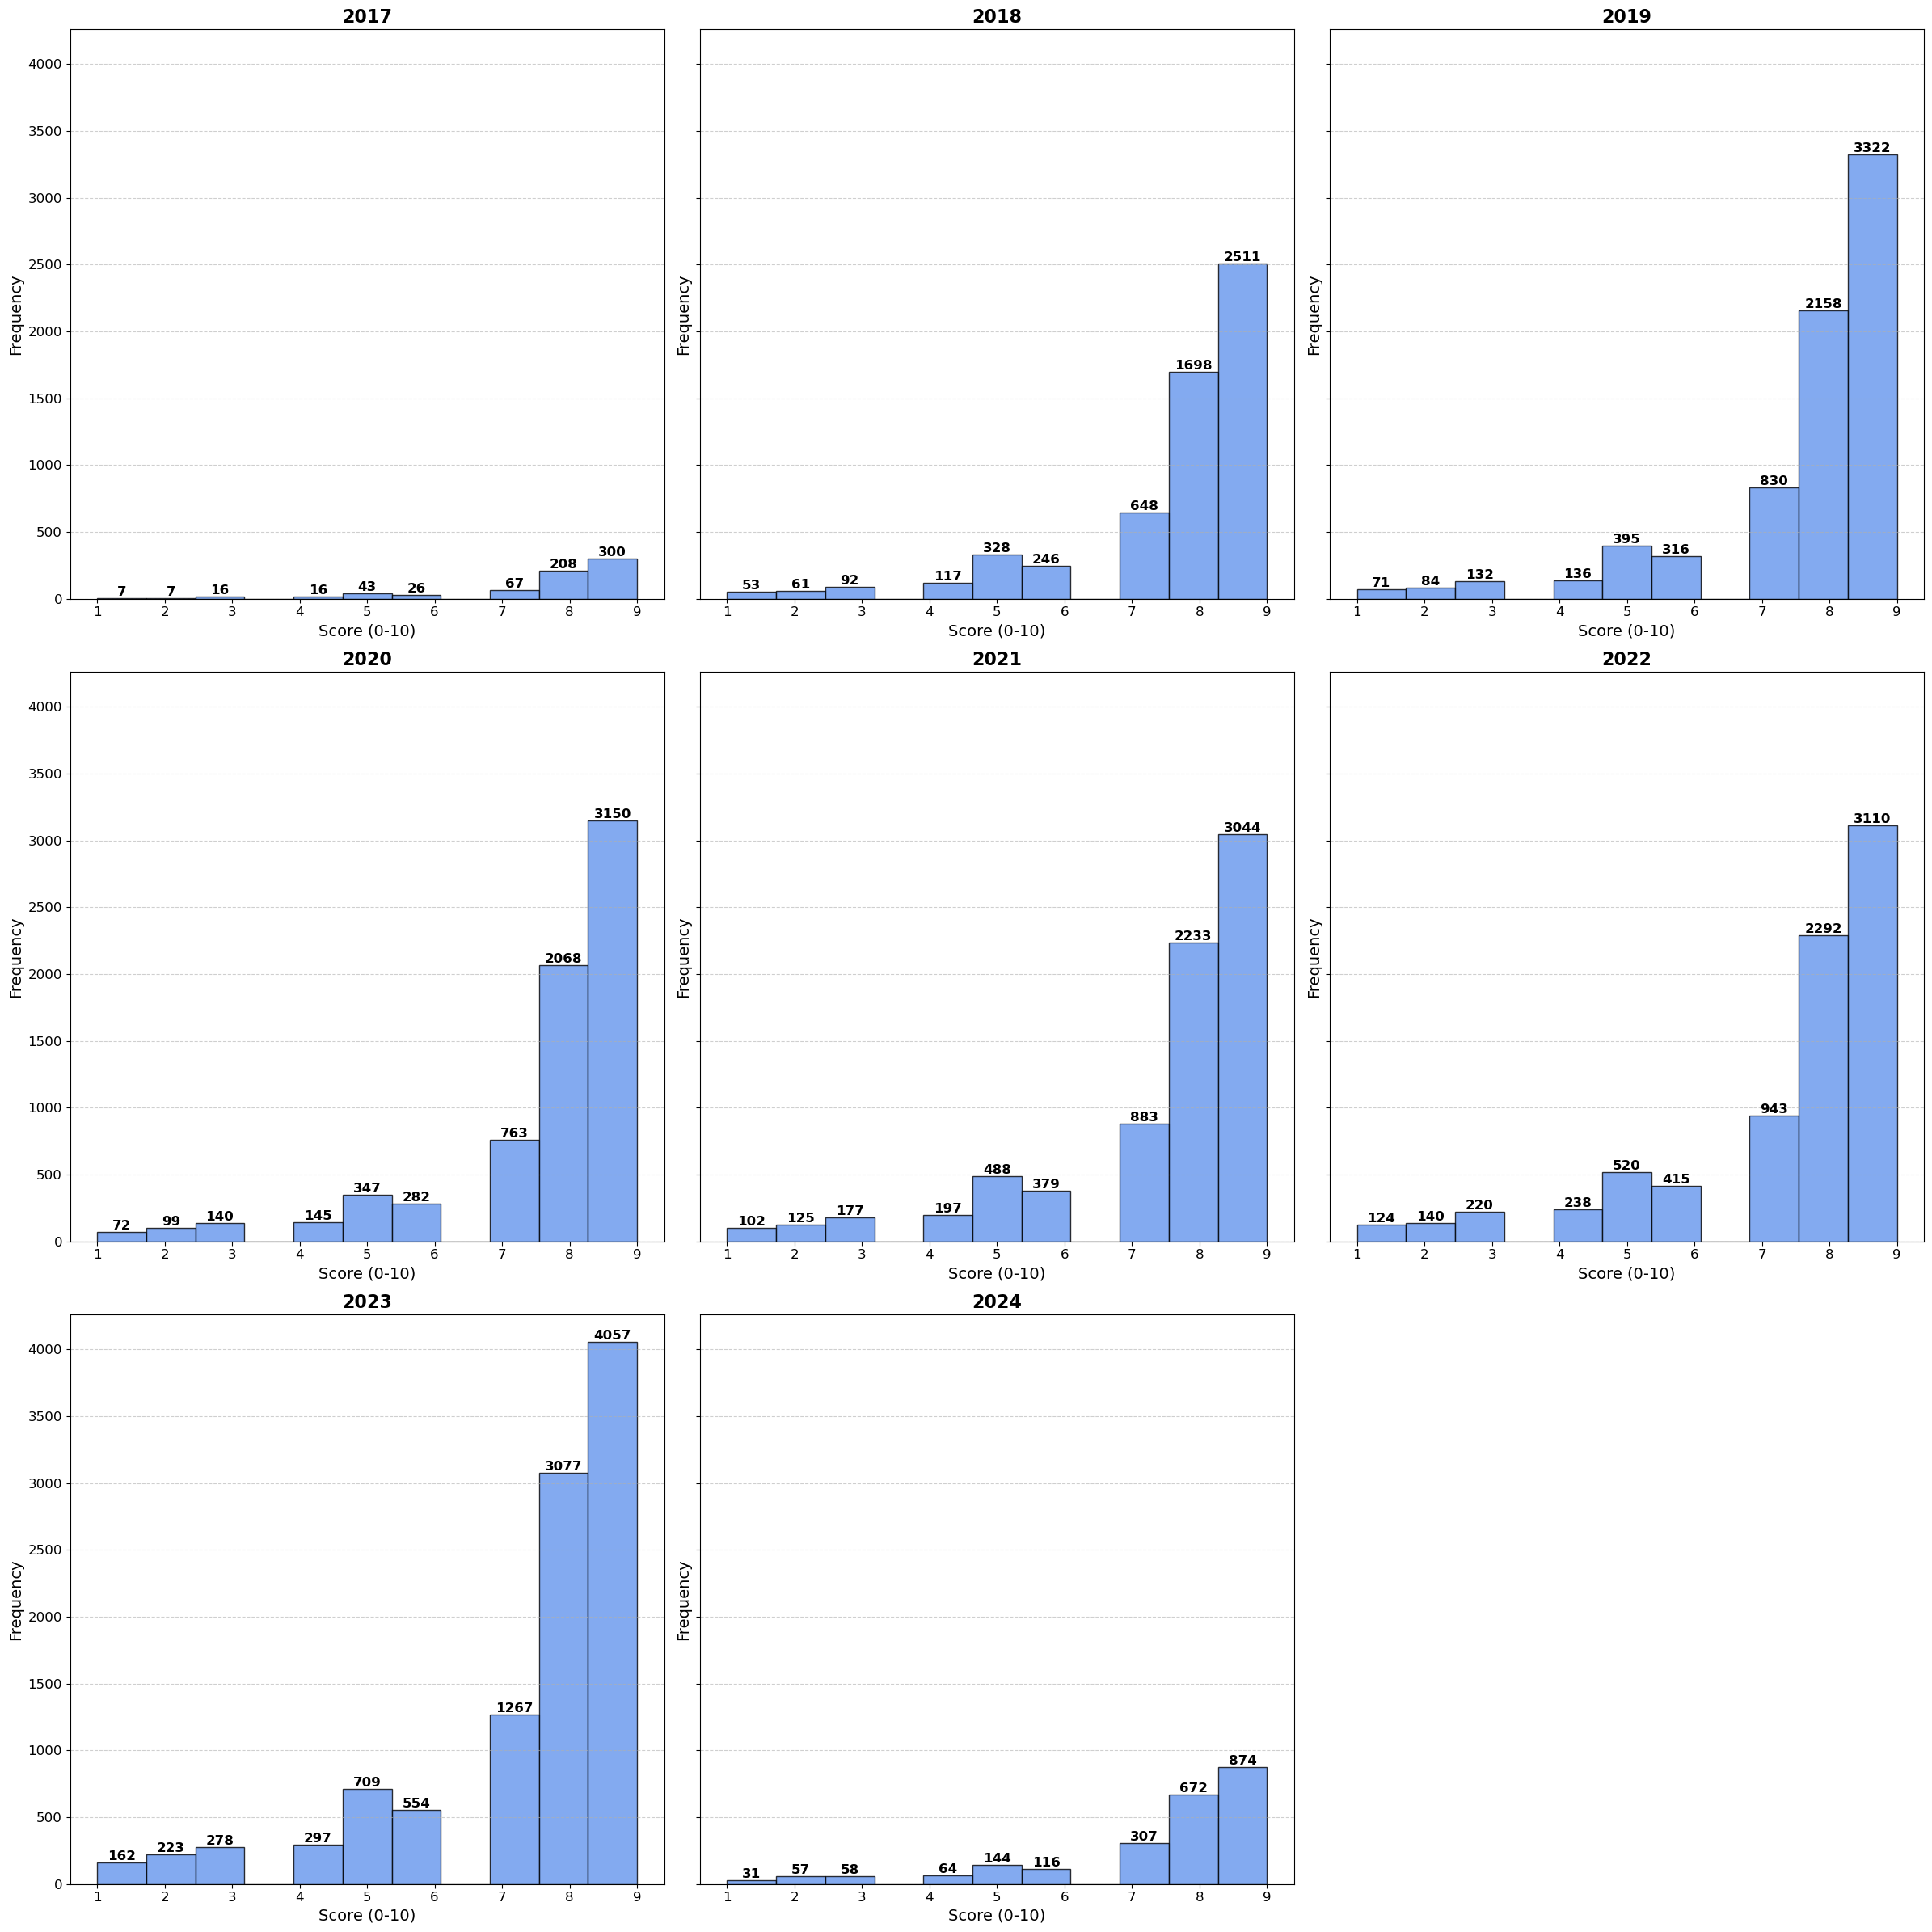

In [31]:
import numpy as np

#Convert 'CMS_23' to numeric and filter the data
cahps['CMS_23'] = pd.to_numeric(cahps['CMS_23'], errors='coerce')
filtered_cahps = cahps[(cahps['CMS_23'] >= 0) & (cahps['CMS_23'] <= 10)]

#Extract year from 'DISDATE'
filtered_cahps['Year'] = filtered_cahps['DISDATE'].dt.year

#Plot the data using subplots
unique_years = sorted(filtered_cahps['Year'].dropna().unique())
num_years = len(unique_years)

#Calculate number of rows needed
num_rows = int(np.ceil(num_years / 3))

#Create with 3 per row and increased figure size
fig, axes = plt.subplots(num_rows, 3, figsize=(24, num_rows * 8), sharey=True)

#Flatten the axes array
axes = axes.flatten()

for i, year in enumerate(unique_years):
    yearly_data = filtered_cahps[filtered_cahps['Year'] == year]['CMS_23']
    n, bins, patches = axes[i].hist(yearly_data, bins=11, color='cornflowerblue', edgecolor='black', alpha=0.8)
    
    #Add numbers to each bar
    for count, bin_edge in zip(n, bins):
        if count > 0:  
            axes[i].text(bin_edge + (bins[1] - bins[0]) / 2, count, int(count),
                         ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    axes[i].set_title(f'{int(year)}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Score (0-10)', fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

#Hide anything unused 
for j in range(num_years, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\2556369450.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cahps['Year'] = filtered_cahps['DISDATE'].dt.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\2556369450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cahps['Month'] = filtered_cahps['DISDATE'].dt.month


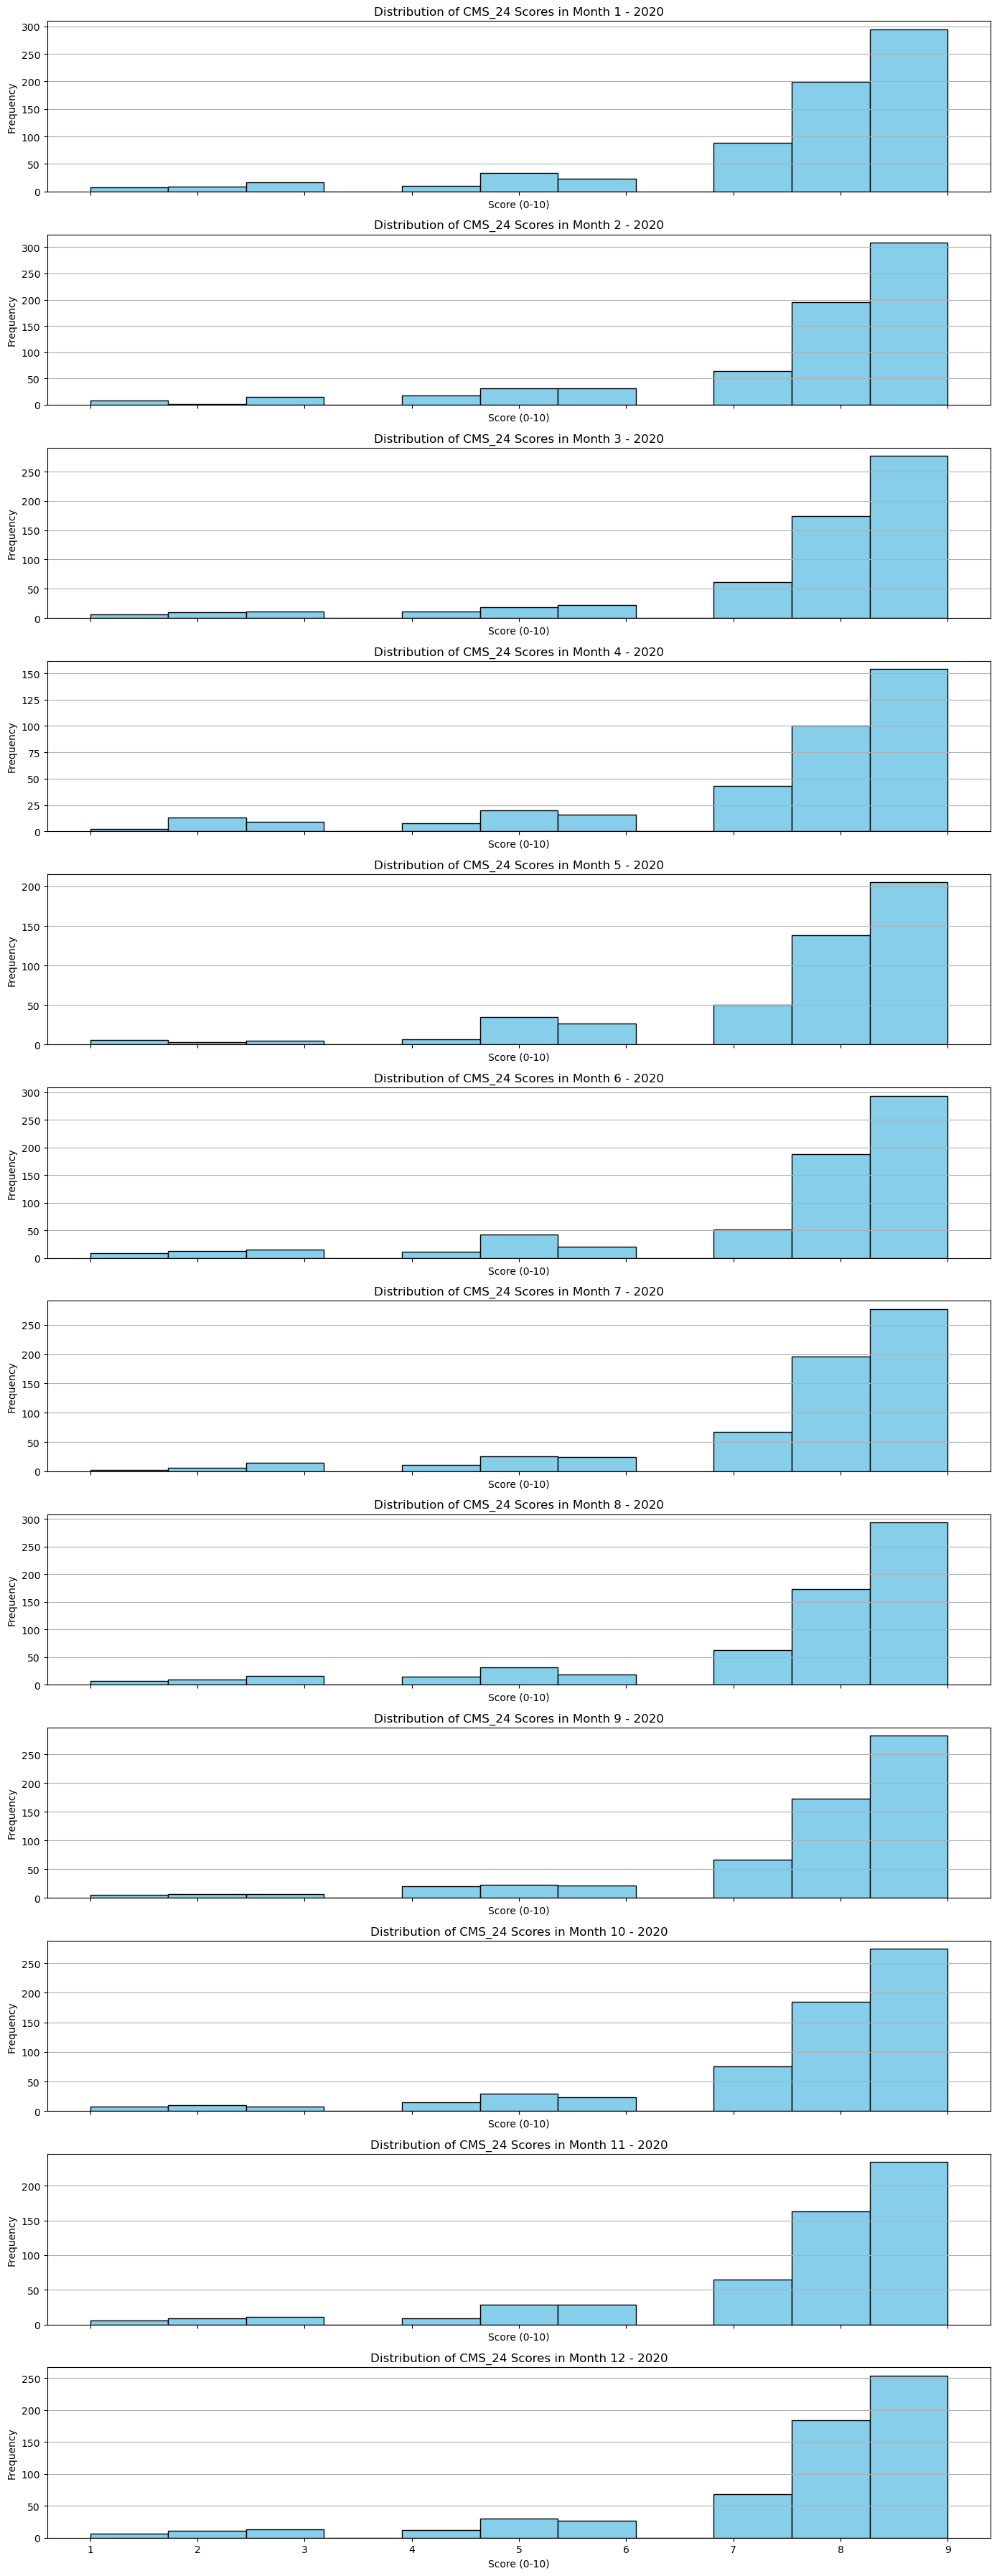

In [32]:
#Will showcase each month in the year 2020 speciically looking at March when Pandemic started
cahps['CMS_23'] = pd.to_numeric(cahps['CMS_23'], errors='coerce')
filtered_cahps = cahps[(cahps['CMS_23'] >= 0) & (cahps['CMS_23'] <= 10)]

#Extract year and month from 'DISDATE'
filtered_cahps['Year'] = filtered_cahps['DISDATE'].dt.year
filtered_cahps['Month'] = filtered_cahps['DISDATE'].dt.month

#Filter for the year 2020
cahps_2020 = filtered_cahps[filtered_cahps['Year'] == 2020]

#Get the list of months in 2020
months = sorted(cahps_2020['Month'].dropna().unique())
num_months = len(months)

#Create subplots
fig, axes = plt.subplots(num_months, 1, figsize=(14, num_months * 3), sharex=True)

#Plot the data for each month
for i, month in enumerate(months):
    monthly_data = cahps_2020[cahps_2020['Month'] == month]['CMS_23']
    axes[i].hist(monthly_data, bins=11, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of CMS_24 Scores in Month {int(month)} - 2020')
    axes[i].set_xlabel('Score (0-10)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()
#Surprisingly in March the reviews were still high. I dont have exact days but im assuming this must have been before Pandemic started

In [33]:
#Filtering out everything prior to 2017cahps['DISDATE'] = pd.to_datetime(cahps['DISDATE'])

# Filter out data before 2017
cahps_new = cahps[cahps['DISDATE'].dt.year >= 2017]

# Display the filtered DataFrame
print(cahps_new)


          SURVEY_ID  CLIENT_ID SERVICE    DISDATE        CLIENT_DESC  \
364      1493151269       1712      PY 2017-01-17  Abington Memorial   
365      1332145446       1712      ON 2017-04-30  Abington Memorial   
366      1332896171       1712      ER 2017-05-27  Abington Memorial   
367      1331661364       1712      MD 2017-06-02  Abington Memorial   
368      1337724285       1712      IN 2017-06-08  Abington Memorial   
...             ...        ...     ...        ...                ...   
1380074  6607598596      27795      MD 2024-03-26           JCP Aria   
1380075  6607577786      27795      MD 2024-03-26           JCP Aria   
1380076  6607553799      27795      MD 2024-03-26           JCP Aria   
1380077  6607555333      27795      MD 2024-03-26           JCP Aria   
1380078  6607604980      27795      MD 2024-03-26           JCP Aria   

         GROUPER_1     SEX  AGE_AT_DISCH                       RACE  INSURANC  \
364       Abington    Male          74.0              

In [34]:
#Want to see all data types
data_types = cahps_new.dtypes

print(data_types)
#Too many columns for that, will just look when needed

SURVEY_ID               int64
CLIENT_ID               int64
SERVICE                object
DISDATE        datetime64[ns]
CLIENT_DESC            object
                    ...      
SS5                   float64
SS131                 float64
O2                    float64
O3                    float64
O4                    float64
Length: 92, dtype: object


In [35]:
#Changing from categorical to numerical data
mapping = {
    'Never': 1,
    'Sometimes': 2,
    'Usually': 3,
    'Always': 4
}

#Apply the mapping to the entire DataFrame, keeping NULLs as NULL
cahps_new.replace(mapping, inplace=True)

#Print the modified DataFrame
print(cahps_new)

C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3691265107.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new.replace(mapping, inplace=True)


          SURVEY_ID  CLIENT_ID SERVICE    DISDATE        CLIENT_DESC  \
364      1493151269       1712      PY 2017-01-17  Abington Memorial   
365      1332145446       1712      ON 2017-04-30  Abington Memorial   
366      1332896171       1712      ER 2017-05-27  Abington Memorial   
367      1331661364       1712      MD 2017-06-02  Abington Memorial   
368      1337724285       1712      IN 2017-06-08  Abington Memorial   
...             ...        ...     ...        ...                ...   
1380074  6607598596      27795      MD 2024-03-26           JCP Aria   
1380075  6607577786      27795      MD 2024-03-26           JCP Aria   
1380076  6607553799      27795      MD 2024-03-26           JCP Aria   
1380077  6607555333      27795      MD 2024-03-26           JCP Aria   
1380078  6607604980      27795      MD 2024-03-26           JCP Aria   

         GROUPER_1     SEX  AGE_AT_DISCH                       RACE  INSURANC  \
364       Abington    Male          74.0              

In [36]:
#Want to make sure the changes did happen
numeric_changes = cahps_new['CMS_1'].unique()
print(numeric_changes)
#I made sure to use a few different column to make sure it was all changed just preserved
#Space by doing it in one line and changing it

[nan  3.  4.  2.  1.]


In [37]:
#Creating a score with more variability first will see the mean/avg of them before
#Nurse Portion
mean_cms_1 = cahps_new['CMS_1'].mean()

print("Did nurses treat you with courtesy and respect?", mean_cms_1)

mean_cms_2 = cahps_new['CMS_2'].mean()

print("Did nurses listen to you carefully?", mean_cms_2)

mean_cms_3 = cahps_new['CMS_3'].mean()

print("Did nurses explain things in a way you could understand?", mean_cms_3)

Did nurses treat you with courtesy and respect? 3.820291920369651
Did nurses listen to you carefully? 3.7148659450817725
Did nurses explain things in a way you could understand? 3.7004409094838766


In [38]:
#Doctor Communication
mean_cms6 = cahps_new['CMS_6'].mean()
print("Did Doctors treat you with courtesy and respect?", mean_cms6)

mean_cms_7 = cahps_new['CMS_7'].mean()

print("Did Doctors listen to you carefully?", mean_cms_2)

mean_cms_8 = cahps_new['CMS_8'].mean()

print("Did Doctors explain things in a way you could understand?", mean_cms_3)

Did Doctors treat you with courtesy and respect? 3.7943834208105622
Did Doctors listen to you carefully? 3.7148659450817725
Did Doctors explain things in a way you could understand? 3.7004409094838766


In [39]:
#Hospital Enviorment

mean_cms10 = cahps_new['CMS_10'].mean()
print("Were your room and bathroom kept clean?", mean_cms10)

mean_cms11 = cahps_new['CMS_11'].mean()
print("Was the area around your room quiet at night?", mean_cms11)

Were your room and bathroom kept clean? 3.461729822915189
Was the area around your room quiet at night? 3.311148341600692


In [40]:
#Medicine Communication
mean_cms19 = cahps_new['CMS_19'].mean()
#Before giving you any new medicine how often did hospital staff...
print("Tell you what your medicine was for", mean_cms19)

mean_cms33 = cahps_new['CMS_33'].mean()
print("describe possible side-effects of the medicine in a way you could understand?," ,mean_cms33)
#We can see cms19 was the lowest score we have seen so far

Tell you what your medicine was for 2.932919700063916
describe possible side-effects of the medicine in a way you could understand?, 3.63928516643657


In [41]:
value_counts = cahps_new['CMS_21'].value_counts(dropna=False)

#Checked the values since i was getting errors. Since they are yes and no answers I will change it to 1 as Yes and 0 as No
print(value_counts)

value_counts2 = cahps_new['CMS_22'].value_counts(dropna=False)

#Checked the values since I was getting errors. Since they are yes and no answers I will change it to 1 as Yes and 0 as No
print(value_counts2)


CMS_21
NaN    1294538
Yes      68970
No       15237
Name: count, dtype: int64
CMS_22
NaN    1294967
Yes      74402
No        9376
Name: count, dtype: int64


In [42]:
#Will Change Yes No to 0-1 
# Define the mapping dictionary
yes_no_mapping = {
    'Yes': 1,
    'No': 0
}

#Applying mapping to df
cahps_new.replace(yes_no_mapping, inplace=True)

#Print new mapping
print(cahps_new)

          SURVEY_ID  CLIENT_ID SERVICE    DISDATE        CLIENT_DESC  \
364      1493151269       1712      PY 2017-01-17  Abington Memorial   
365      1332145446       1712      ON 2017-04-30  Abington Memorial   
366      1332896171       1712      ER 2017-05-27  Abington Memorial   
367      1331661364       1712      MD 2017-06-02  Abington Memorial   
368      1337724285       1712      IN 2017-06-08  Abington Memorial   
...             ...        ...     ...        ...                ...   
1380074  6607598596      27795      MD 2024-03-26           JCP Aria   
1380075  6607577786      27795      MD 2024-03-26           JCP Aria   
1380076  6607553799      27795      MD 2024-03-26           JCP Aria   
1380077  6607555333      27795      MD 2024-03-26           JCP Aria   
1380078  6607604980      27795      MD 2024-03-26           JCP Aria   

         GROUPER_1     SEX  AGE_AT_DISCH                       RACE  INSURANC  \
364       Abington    Male          74.0              

C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\1377637626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new.replace(yes_no_mapping, inplace=True)


In [43]:
#Discharge Communication 
mean_cms21 = cahps_new['CMS_21'].mean()
print("Did Doctors, nurses, or hospital staff talk to you about whether you would have the help needed when left the hospital?", mean_cms21)

mean_cms22 = cahps_new['CMS_22'].mean()
print("Did you get the information in writing about what symptoms or health problems to look out for after you left the hospital?", mean_cms22)

Did Doctors, nurses, or hospital staff talk to you about whether you would have the help needed when left the hospital? 0.8190530478463786
Did you get the information in writing about what symptoms or health problems to look out for after you left the hospital? 0.888085177492898


In [44]:
value_counts = cahps_new['CMS_38'].value_counts(dropna=False)

#Checked the values again. Remapping this.
print(value_counts)

CMS_38
NaN                  1288780
Agree                  41535
Strongly agree         39941
Disagree                5648
Strongly disagree       2841
Name: count, dtype: int64


In [45]:
#Same way as before, keeping it as 1-4 to keep consistent with previous change
agreement_mapping = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Agree': 3,
    'Strongly agree': 4
}

#Applying
cahps_new.replace(agreement_mapping, inplace=True)

# Print
print(cahps_new)

          SURVEY_ID  CLIENT_ID SERVICE    DISDATE        CLIENT_DESC  \
364      1493151269       1712      PY 2017-01-17  Abington Memorial   
365      1332145446       1712      ON 2017-04-30  Abington Memorial   
366      1332896171       1712      ER 2017-05-27  Abington Memorial   
367      1331661364       1712      MD 2017-06-02  Abington Memorial   
368      1337724285       1712      IN 2017-06-08  Abington Memorial   
...             ...        ...     ...        ...                ...   
1380074  6607598596      27795      MD 2024-03-26           JCP Aria   
1380075  6607577786      27795      MD 2024-03-26           JCP Aria   
1380076  6607553799      27795      MD 2024-03-26           JCP Aria   
1380077  6607555333      27795      MD 2024-03-26           JCP Aria   
1380078  6607604980      27795      MD 2024-03-26           JCP Aria   

         GROUPER_1     SEX  AGE_AT_DISCH                       RACE  INSURANC  \
364       Abington    Male          74.0              

C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\824532005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new.replace(agreement_mapping, inplace=True)


In [46]:
value_counts = cahps_new['CMS_40'].value_counts(dropna=False)

#Checked the values again. Remapping this.
print(value_counts)

CMS_40
NaN               1287612
4                   47416
3                   27594
Not given meds      11370
2                    2602
1                    2151
Name: count, dtype: int64


In [47]:
# Replace 'Not given meds' with NaN in the 'CMS_40' column question is not relevant for them
cahps_new['CMS_40'] = cahps_new['CMS_40'].replace('Not given meds', np.nan)

# Print the modified column
print(cahps_new['CMS_40'])

364        NaN
365        NaN
366        NaN
367        NaN
368        3.0
          ... 
1380074    NaN
1380075    NaN
1380076    NaN
1380077    NaN
1380078    NaN
Name: CMS_40, Length: 1378745, dtype: float64


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\413538648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['CMS_40'] = cahps_new['CMS_40'].replace('Not given meds', np.nan)


In [48]:
#Care Transitions
mean_cms38 = cahps_new['CMS_38'].mean()
print("Staff took preferences into account in deciding needs when I left hospital", mean_cms38)
1
mean_cms39 = cahps_new['CMS_39'].mean()
print("I had a good understanding of the things I was responsible for in managing my health", mean_cms39)

mean_cms40 = cahps_new['CMS_40'].mean()
print("I clearly understood the purpose of the medications", mean_cms40)

Staff took preferences into account in deciding needs when I left hospital 3.318023675873951
I had a good understanding of the things I was responsible for in managing my health 3.420435510887772
I clearly understood the purpose of the medications 3.507904667577699


In [49]:
#Now I will combine all these columns to get a better score than just CMS23 creating a new column for this as well
#List of columns to combine
columns_to_combine = [
    'CMS_1', 'CMS_2', 'CMS_3', 'CMS_6', 'CMS_7', 'CMS_8',
    'CMS_10', 'CMS_11', 'CMS_19', 'CMS_21', 'CMS_22',
    'CMS_33', 'CMS_38', 'CMS_39', 'CMS_40'
]

#Combing it
cahps_new['Combined_CMS'] = cahps_new[columns_to_combine].bfill(axis=1).iloc[:, 0]

print(cahps_new[['Combined_CMS'] + columns_to_combine])

         Combined_CMS  CMS_1  CMS_2  CMS_3  CMS_6  CMS_7  CMS_8  CMS_10  \
364               NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
365               NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
366               NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
367               NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
368               3.0    3.0    3.0    3.0    3.0    2.0    3.0     3.0   
...               ...    ...    ...    ...    ...    ...    ...     ...   
1380074           NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
1380075           NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
1380076           NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
1380077           NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
1380078           NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   

         CMS_11  CMS_19  CMS_21  CMS_22  CMS_33  CMS_38  CMS_39  CMS_40  
364         NaN     NaN  

C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\1277101215.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Combined_CMS'] = cahps_new[columns_to_combine].bfill(axis=1).iloc[:, 0]


In [50]:
value_counts = cahps_new['Combined_CMS'].value_counts(dropna=False)

#Checked the values again to ensure it was all done correctly 
print(value_counts)

Combined_CMS
NaN    1284820
4.0      80364
3.0      10079
2.0       3005
1.0        458
0.0         19
Name: count, dtype: int64


In [51]:
#Many Na's giving it a near perfect score. Will ask about NaN, if we should make it 0 instead 
mean_combined = cahps_new['Combined_CMS'].mean()
print("Combined Score:", mean_combined)

Combined Score: 3.8132659036465264


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\1728841665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Combined_CMS'] = pd.to_numeric(cahps_new['Combined_CMS'], errors='coerce')
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\1728841665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cahps_new['Year'] = filtered_cahps_new['DISDATE'].dt.year


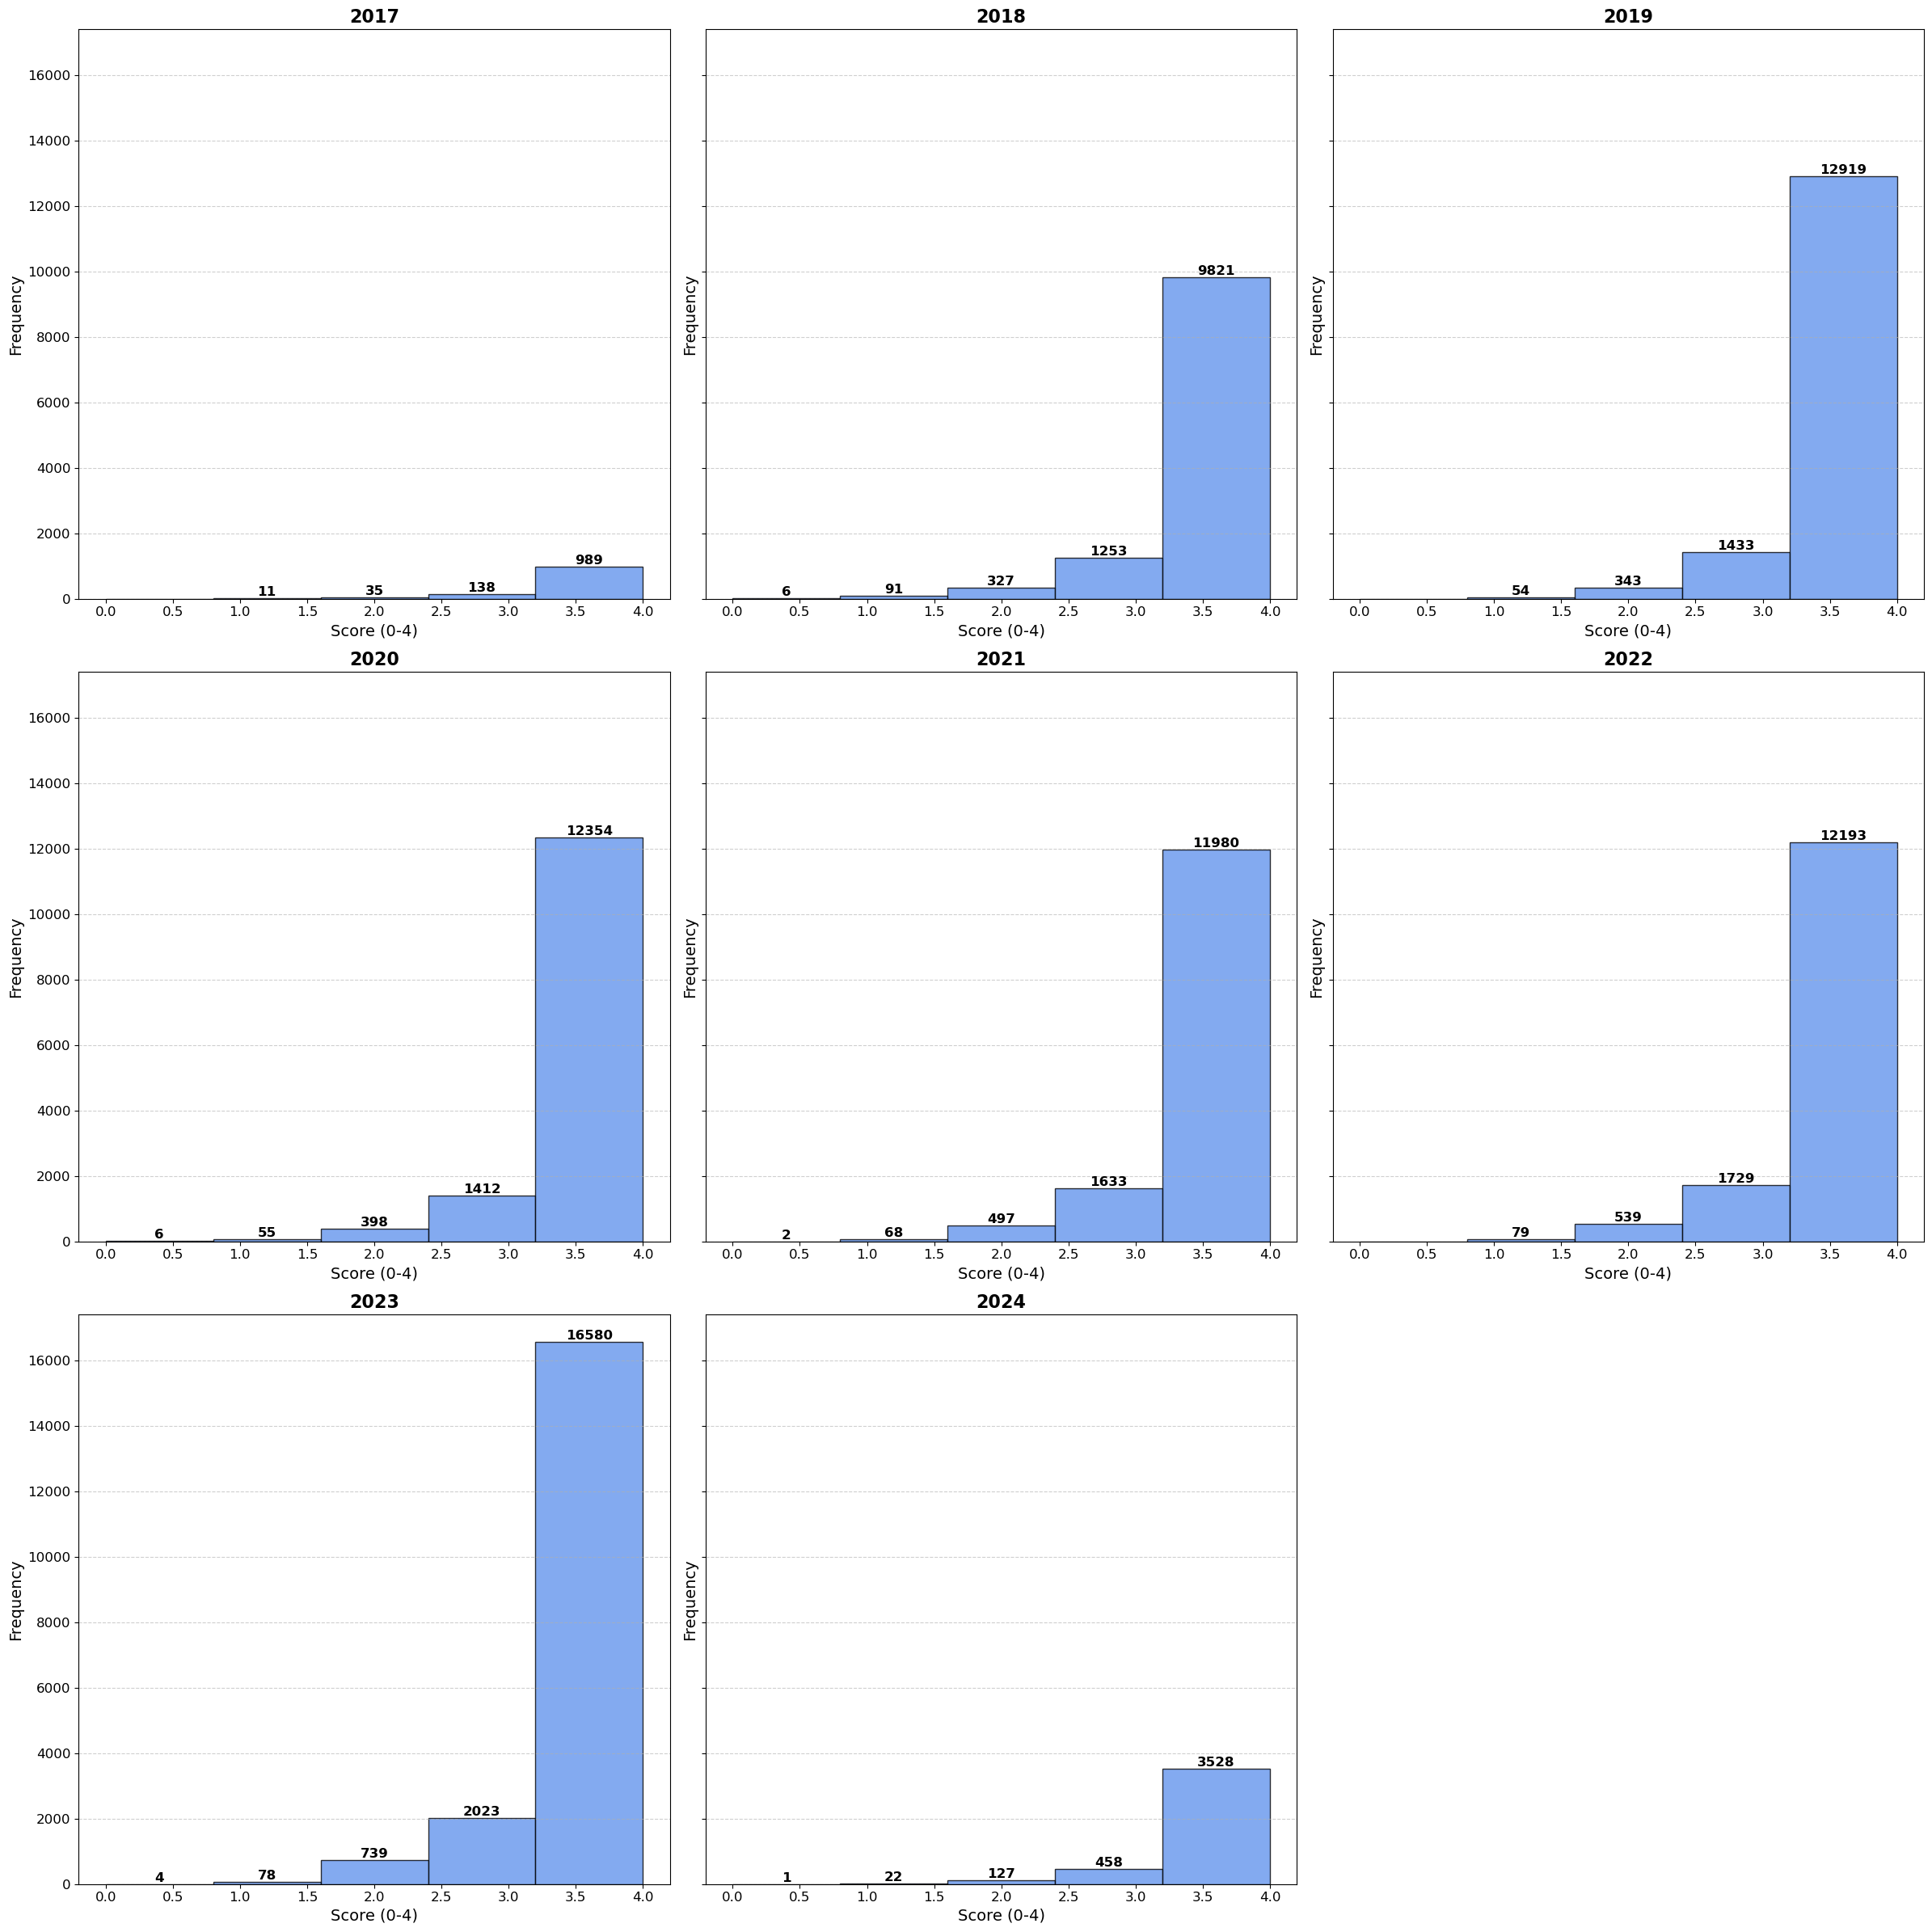

In [52]:
#Convert 'Combined_CMS' to numeric and filter the data
cahps_new['Combined_CMS'] = pd.to_numeric(cahps_new['Combined_CMS'], errors='coerce')
filtered_cahps_new = cahps_new[(cahps_new['Combined_CMS'] >= 0) & (cahps_new['Combined_CMS'] <= 4)]

#Extract year from 'DISDATE'
filtered_cahps_new['Year'] = filtered_cahps_new['DISDATE'].dt.year

#Plot the data using subplots
unique_years = sorted(filtered_cahps_new['Year'].dropna().unique())
num_years = len(unique_years)

#Calculate number of rows needed
num_rows = int(np.ceil(num_years / 3))

#Create graphs with 3 per row and increased figure size
fig, axes = plt.subplots(num_rows, 3, figsize=(24, num_rows * 8), sharey=True)


axes = axes.flatten()

for i, year in enumerate(unique_years):
    yearly_data = filtered_cahps_new[filtered_cahps_new['Year'] == year]['Combined_CMS']
    n, bins, patches = axes[i].hist(yearly_data, bins=5, range=(0, 4), color='cornflowerblue', edgecolor='black', alpha=0.8)
    
    #Add numbers to each bar
    for count, bin_edge in zip(n, bins):
        if count > 0:  #Only annotate if there is a count
            axes[i].text(bin_edge + (bins[1] - bins[0]) / 2, count, int(count),
                         ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    axes[i].set_title(f'{int(year)}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Score (0-4)', fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

#Hide any unused graphs
for j in range(num_years, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3615466422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['DISDATE'] = pd.to_datetime(cahps_new['DISDATE'], errors='coerce')
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3615466422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Year'] = cahps_new['DISDATE'].dt.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3615466422.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

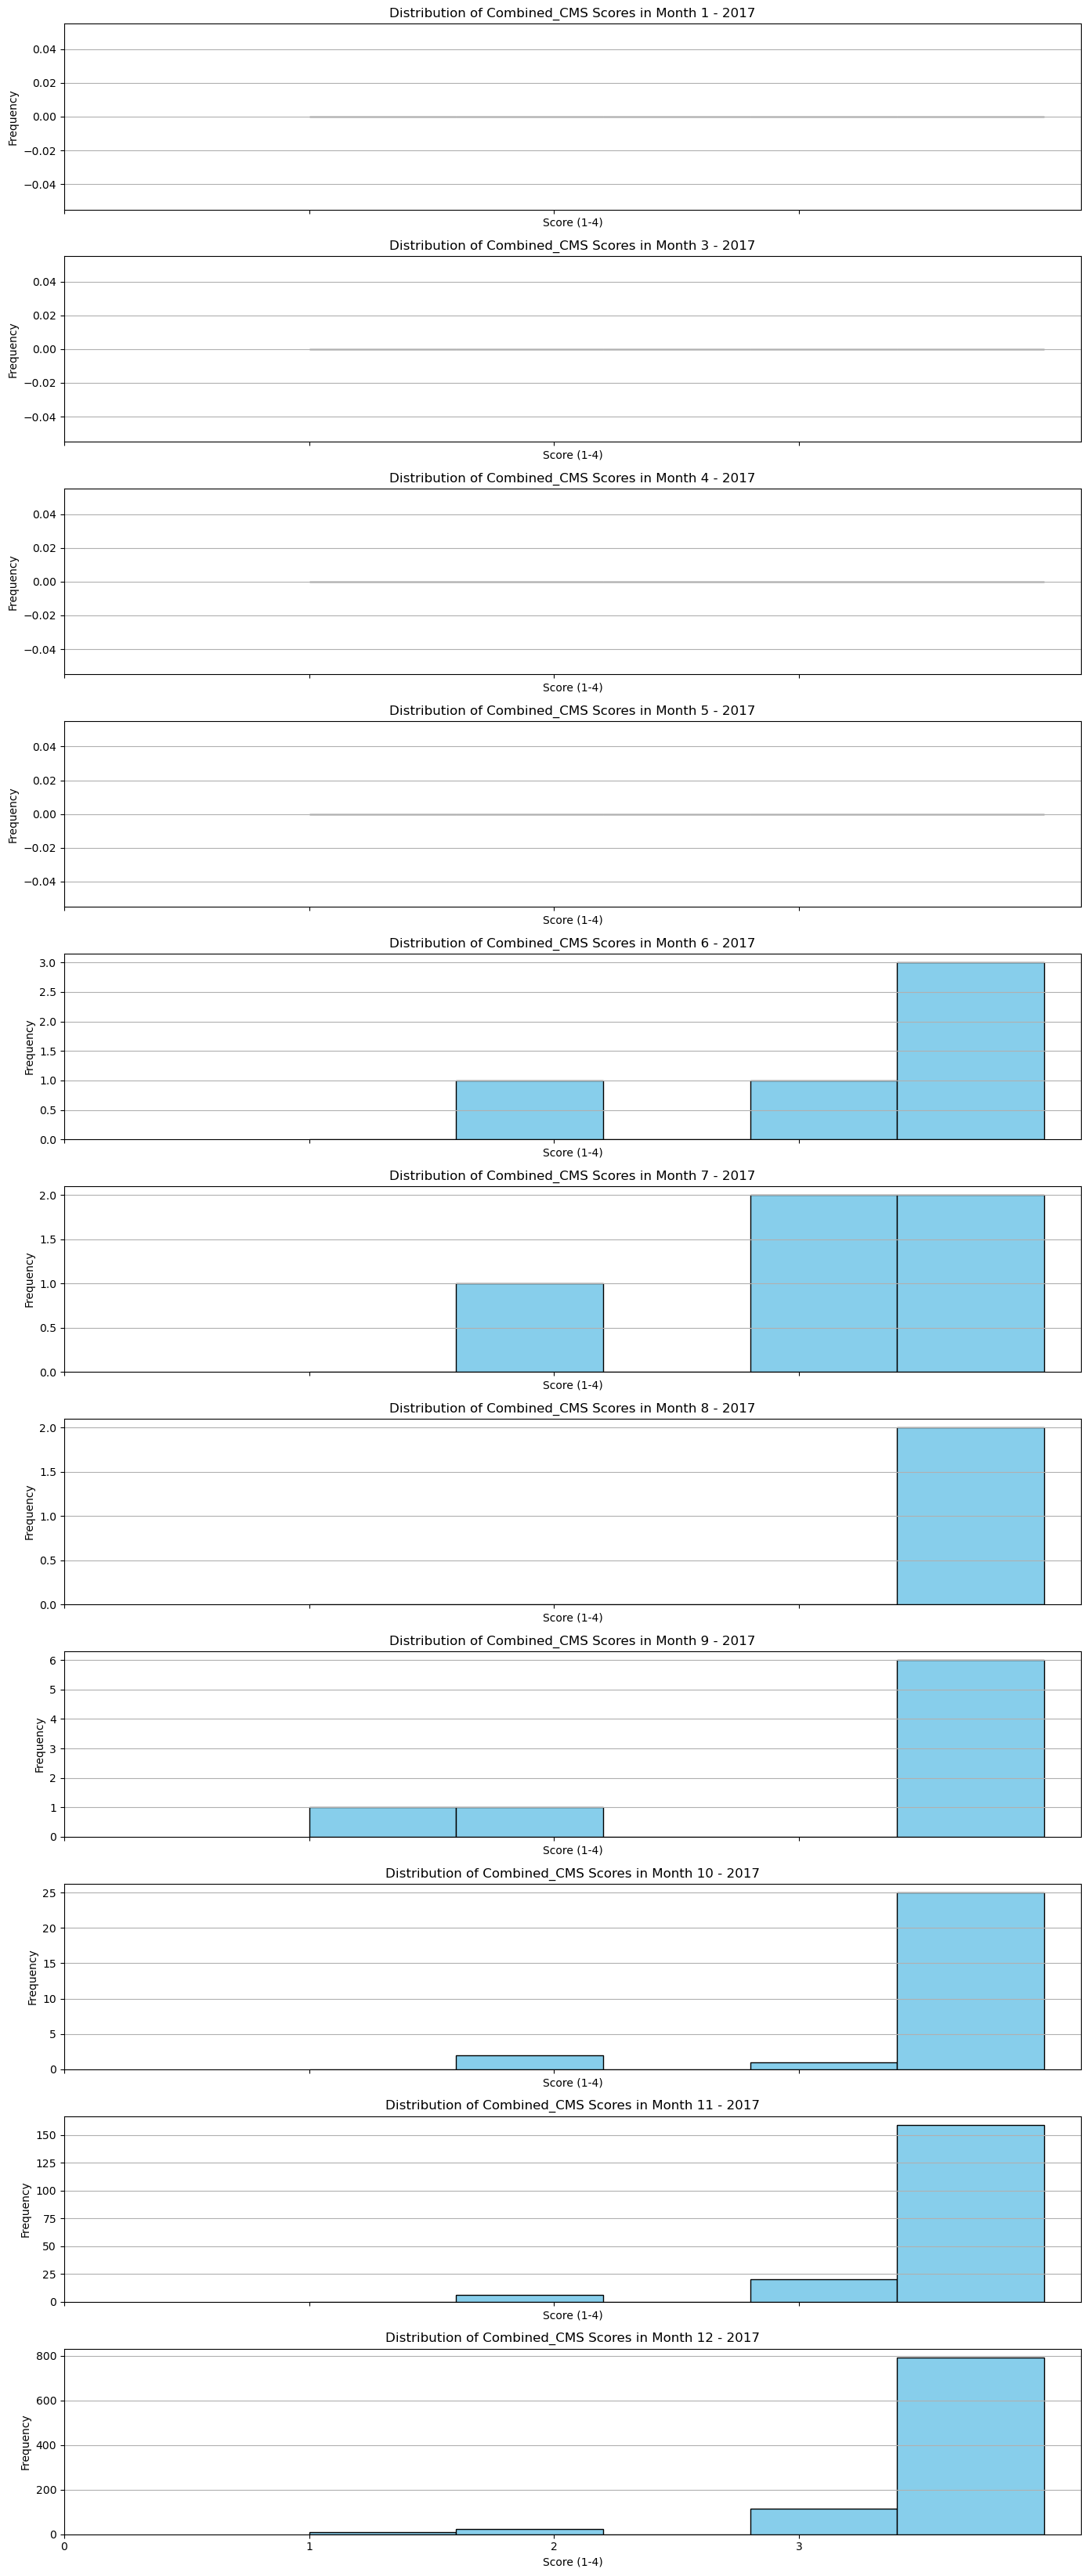

In [53]:
#Convert 'DISDATE' to datetime format I did for previous cahps not new
cahps_new['DISDATE'] = pd.to_datetime(cahps_new['DISDATE'], errors='coerce')

#Extract year and month from 'DISDATE'
cahps_new['Year'] = cahps_new['DISDATE'].dt.year
cahps_new['Month'] = cahps_new['DISDATE'].dt.month

#Filter for the year 2017
cahps_2017 = cahps_new[cahps_new['Year'] == 2017]

#Get the list of months in 2017
months = sorted(cahps_2017['Month'].dropna().unique())
num_months = len(months)

#Create subplots
fig, axes = plt.subplots(num_months, 1, figsize=(14, num_months * 3), sharex=True)

#Plot data for each month
for i, month in enumerate(months):
    monthly_data = cahps_2017[cahps_2017['Month'] == month]['Combined_CMS']
    axes[i].hist(monthly_data, bins=5, color='skyblue', edgecolor='black', range=(1, 4))
    axes[i].set_title(f'Distribution of Combined_CMS Scores in Month {int(month)} - 2017')
    axes[i].set_xlabel('Score (1-4)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(4))
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\845471032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Year'] = cahps_new['DISDATE'].dt.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\845471032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Month'] = cahps_new['DISDATE'].dt.month


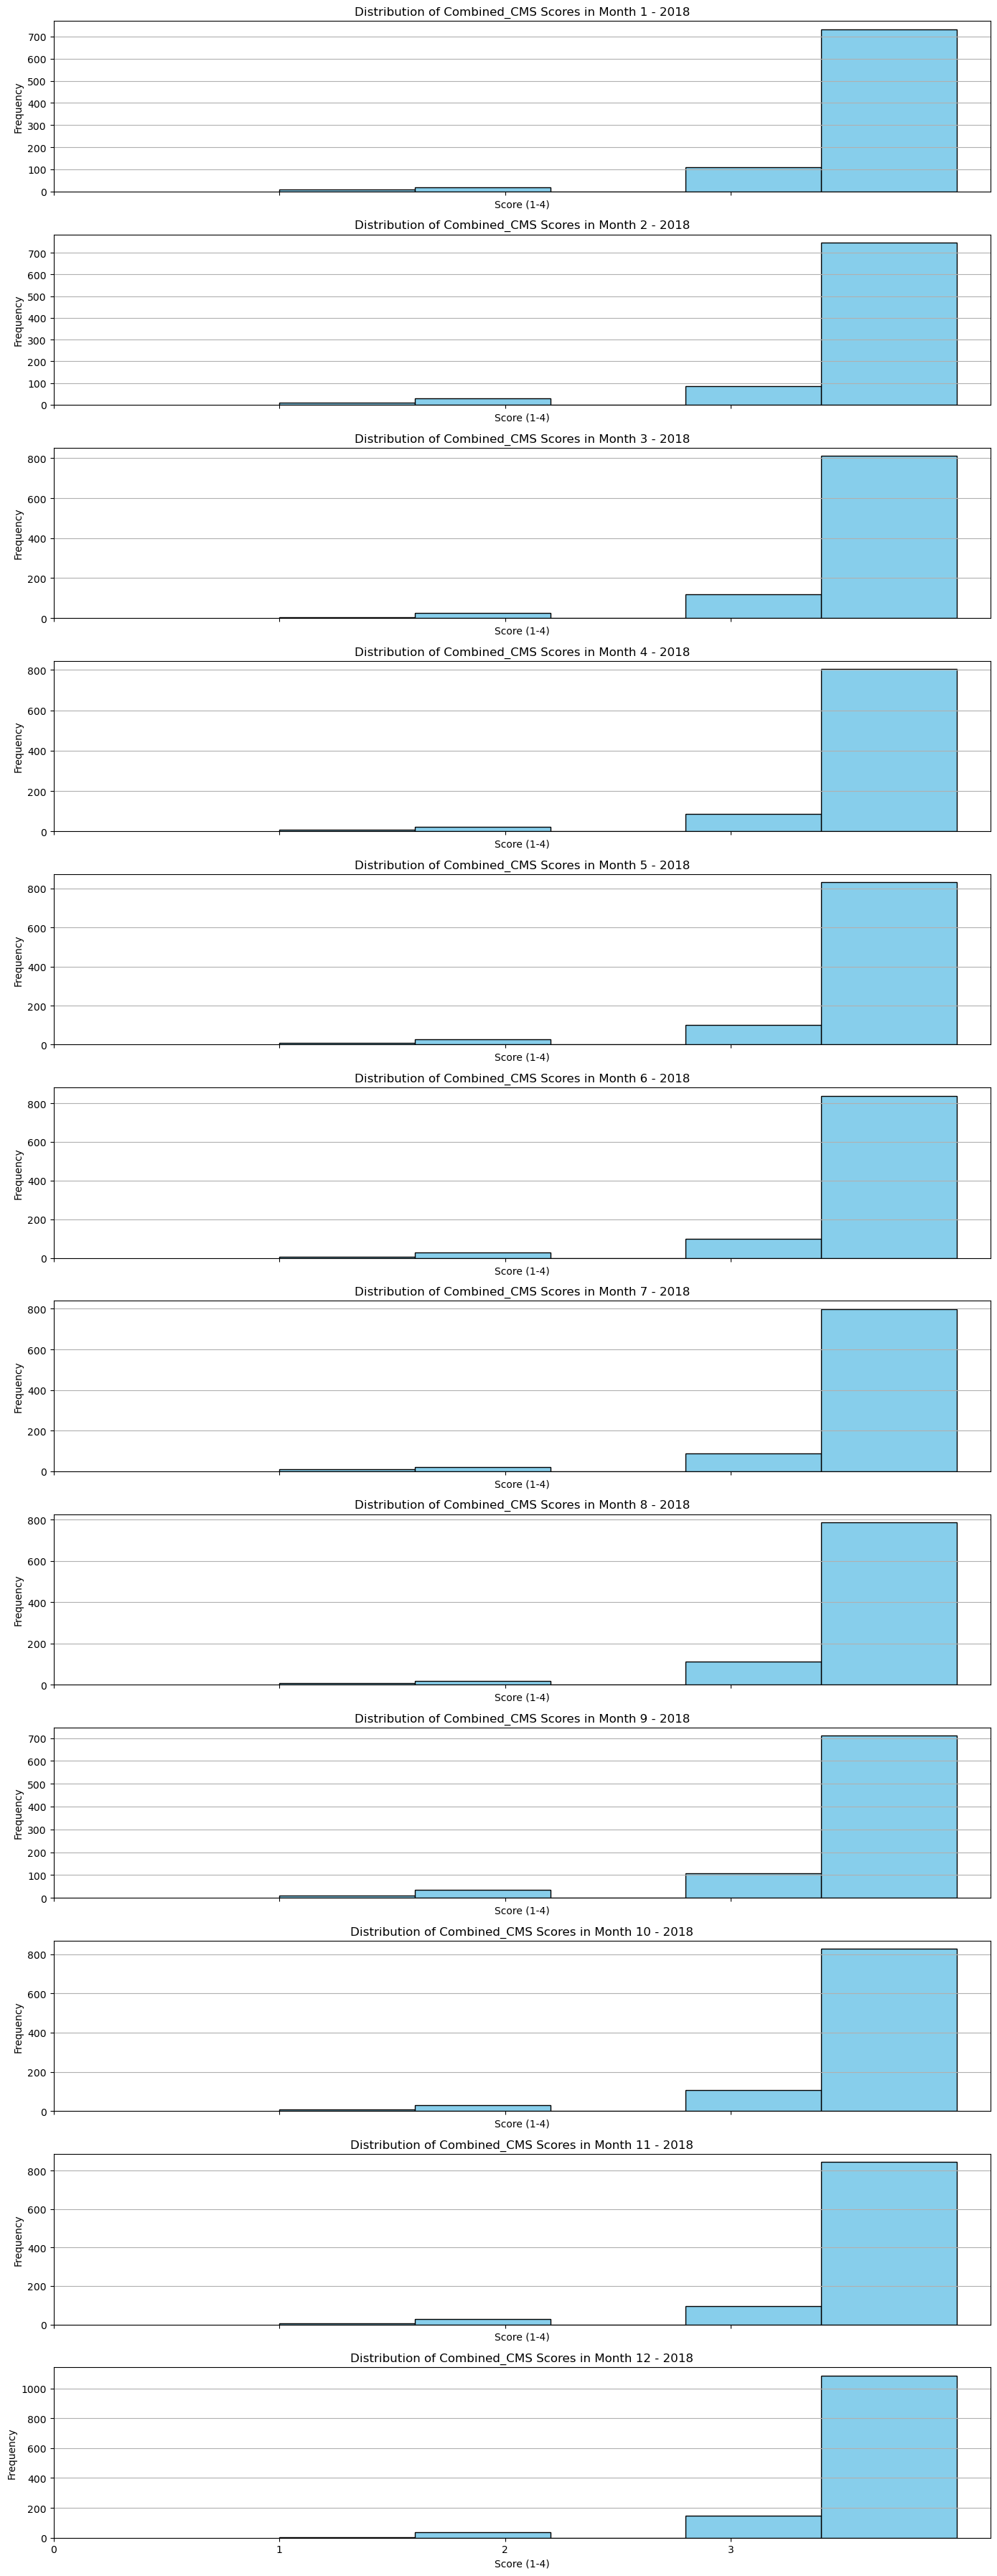

In [54]:
#Doing the same code for every year, will not include comments in these since I did in last one

cahps_new['Year'] = cahps_new['DISDATE'].dt.year
cahps_new['Month'] = cahps_new['DISDATE'].dt.month

cahps_2018 = cahps_new[cahps_new['Year'] == 2018]

months = sorted(cahps_2018['Month'].dropna().unique())
num_months = len(months)

fig, axes = plt.subplots(num_months, 1, figsize=(14, num_months * 3), sharex=True)

for i, month in enumerate(months):
    monthly_data = cahps_2018[cahps_2018['Month'] == month]['Combined_CMS']
    axes[i].hist(monthly_data, bins=5, color='skyblue', edgecolor='black', range=(1, 4))
    axes[i].set_title(f'Distribution of Combined_CMS Scores in Month {int(month)} - 2018')
    axes[i].set_xlabel('Score (1-4)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(4)) 
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3934094379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Year'] = cahps_new['DISDATE'].dt.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3934094379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Month'] = cahps_new['DISDATE'].dt.month


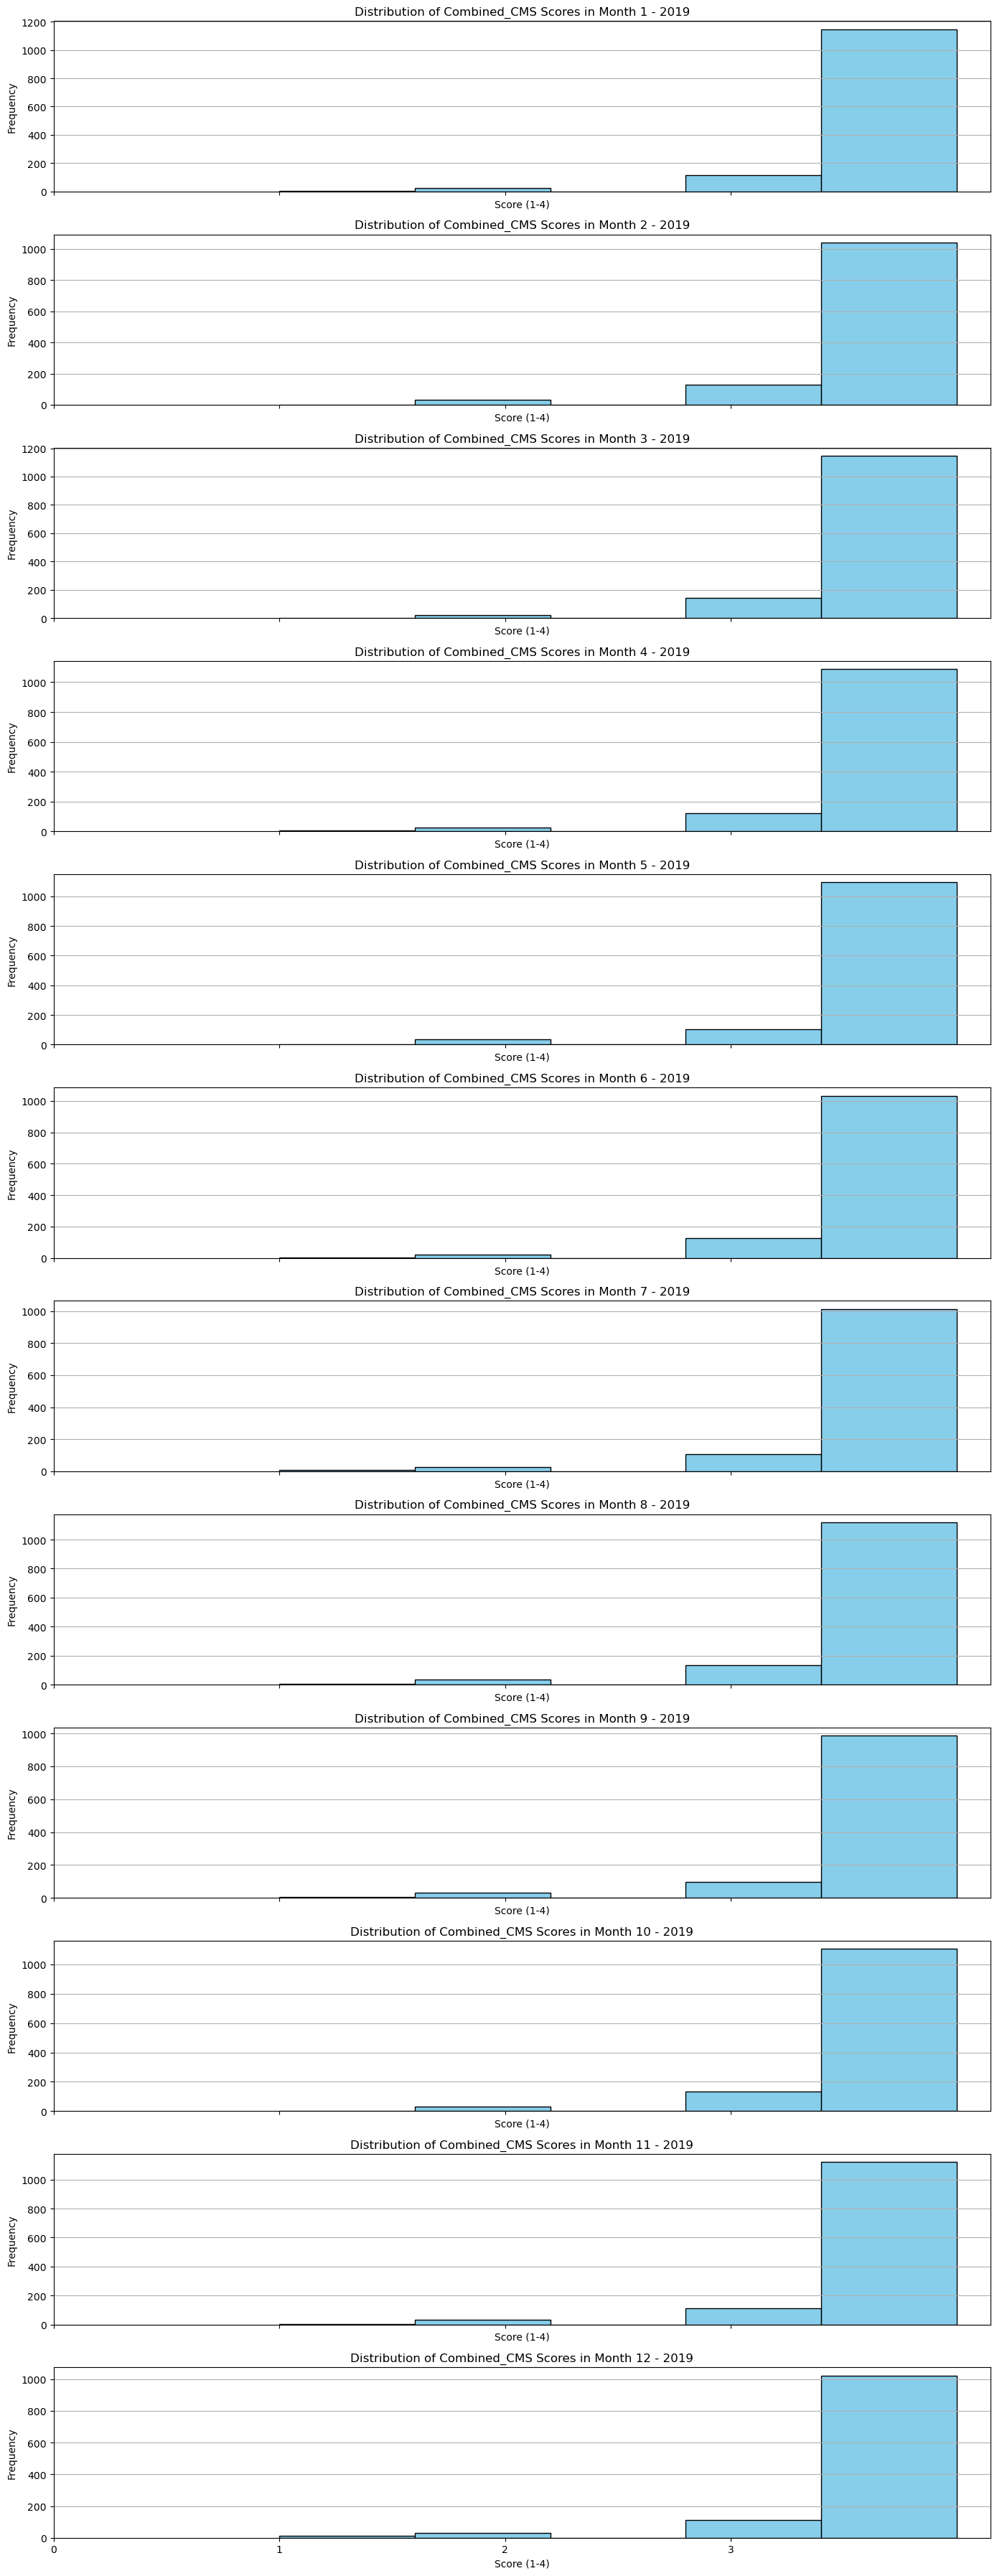

In [55]:
cahps_new['Year'] = cahps_new['DISDATE'].dt.year
cahps_new['Month'] = cahps_new['DISDATE'].dt.month

cahps_2019 = cahps_new[cahps_new['Year'] == 2019]

months = sorted(cahps_2019['Month'].dropna().unique())
num_months = len(months)

fig, axes = plt.subplots(num_months, 1, figsize=(14, num_months * 3), sharex=True)

for i, month in enumerate(months):
    monthly_data = cahps_2019[cahps_2019['Month'] == month]['Combined_CMS']
    axes[i].hist(monthly_data, bins=5, color='skyblue', edgecolor='black', range=(1, 4))
    axes[i].set_title(f'Distribution of Combined_CMS Scores in Month {int(month)} - 2019')
    axes[i].set_xlabel('Score (1-4)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(4)) 
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\4059994352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Year'] = cahps_new['DISDATE'].dt.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\4059994352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Month'] = cahps_new['DISDATE'].dt.month


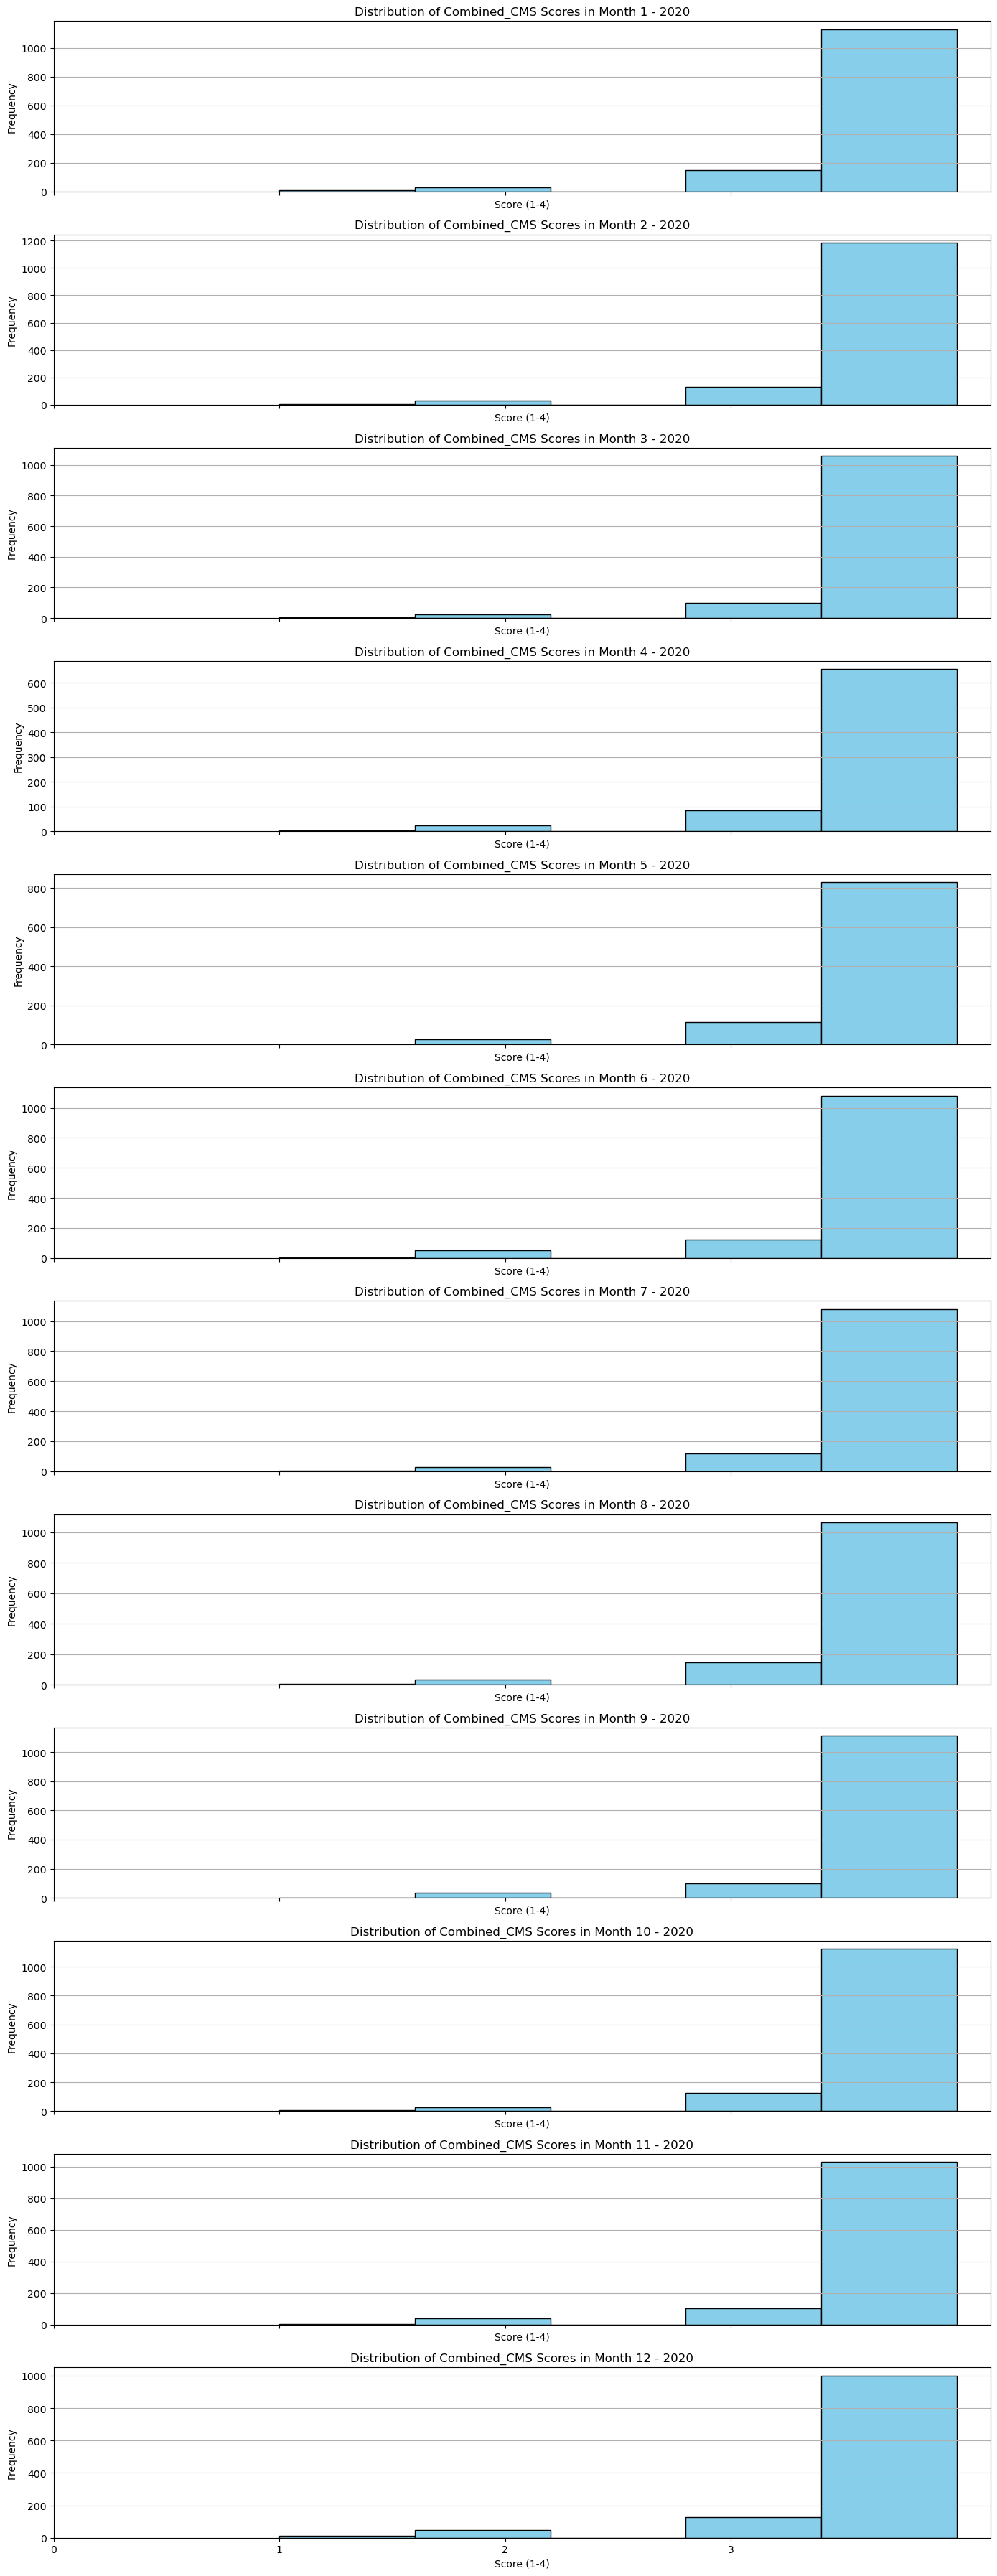

In [56]:
cahps_new['Year'] = cahps_new['DISDATE'].dt.year
cahps_new['Month'] = cahps_new['DISDATE'].dt.month

cahps_2020 = cahps_new[cahps_new['Year'] == 2020]

months = sorted(cahps_2020['Month'].dropna().unique())
num_months = len(months)

fig, axes = plt.subplots(num_months, 1, figsize=(14, num_months * 3), sharex=True)

for i, month in enumerate(months):
    monthly_data = cahps_2020[cahps_2020['Month'] == month]['Combined_CMS']
    axes[i].hist(monthly_data, bins=5, color='skyblue', edgecolor='black', range=(1, 4))
    axes[i].set_title(f'Distribution of Combined_CMS Scores in Month {int(month)} - 2020')
    axes[i].set_xlabel('Score (1-4)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(4))  
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3293524263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Year'] = cahps_new['DISDATE'].dt.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3293524263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Month'] = cahps_new['DISDATE'].dt.month


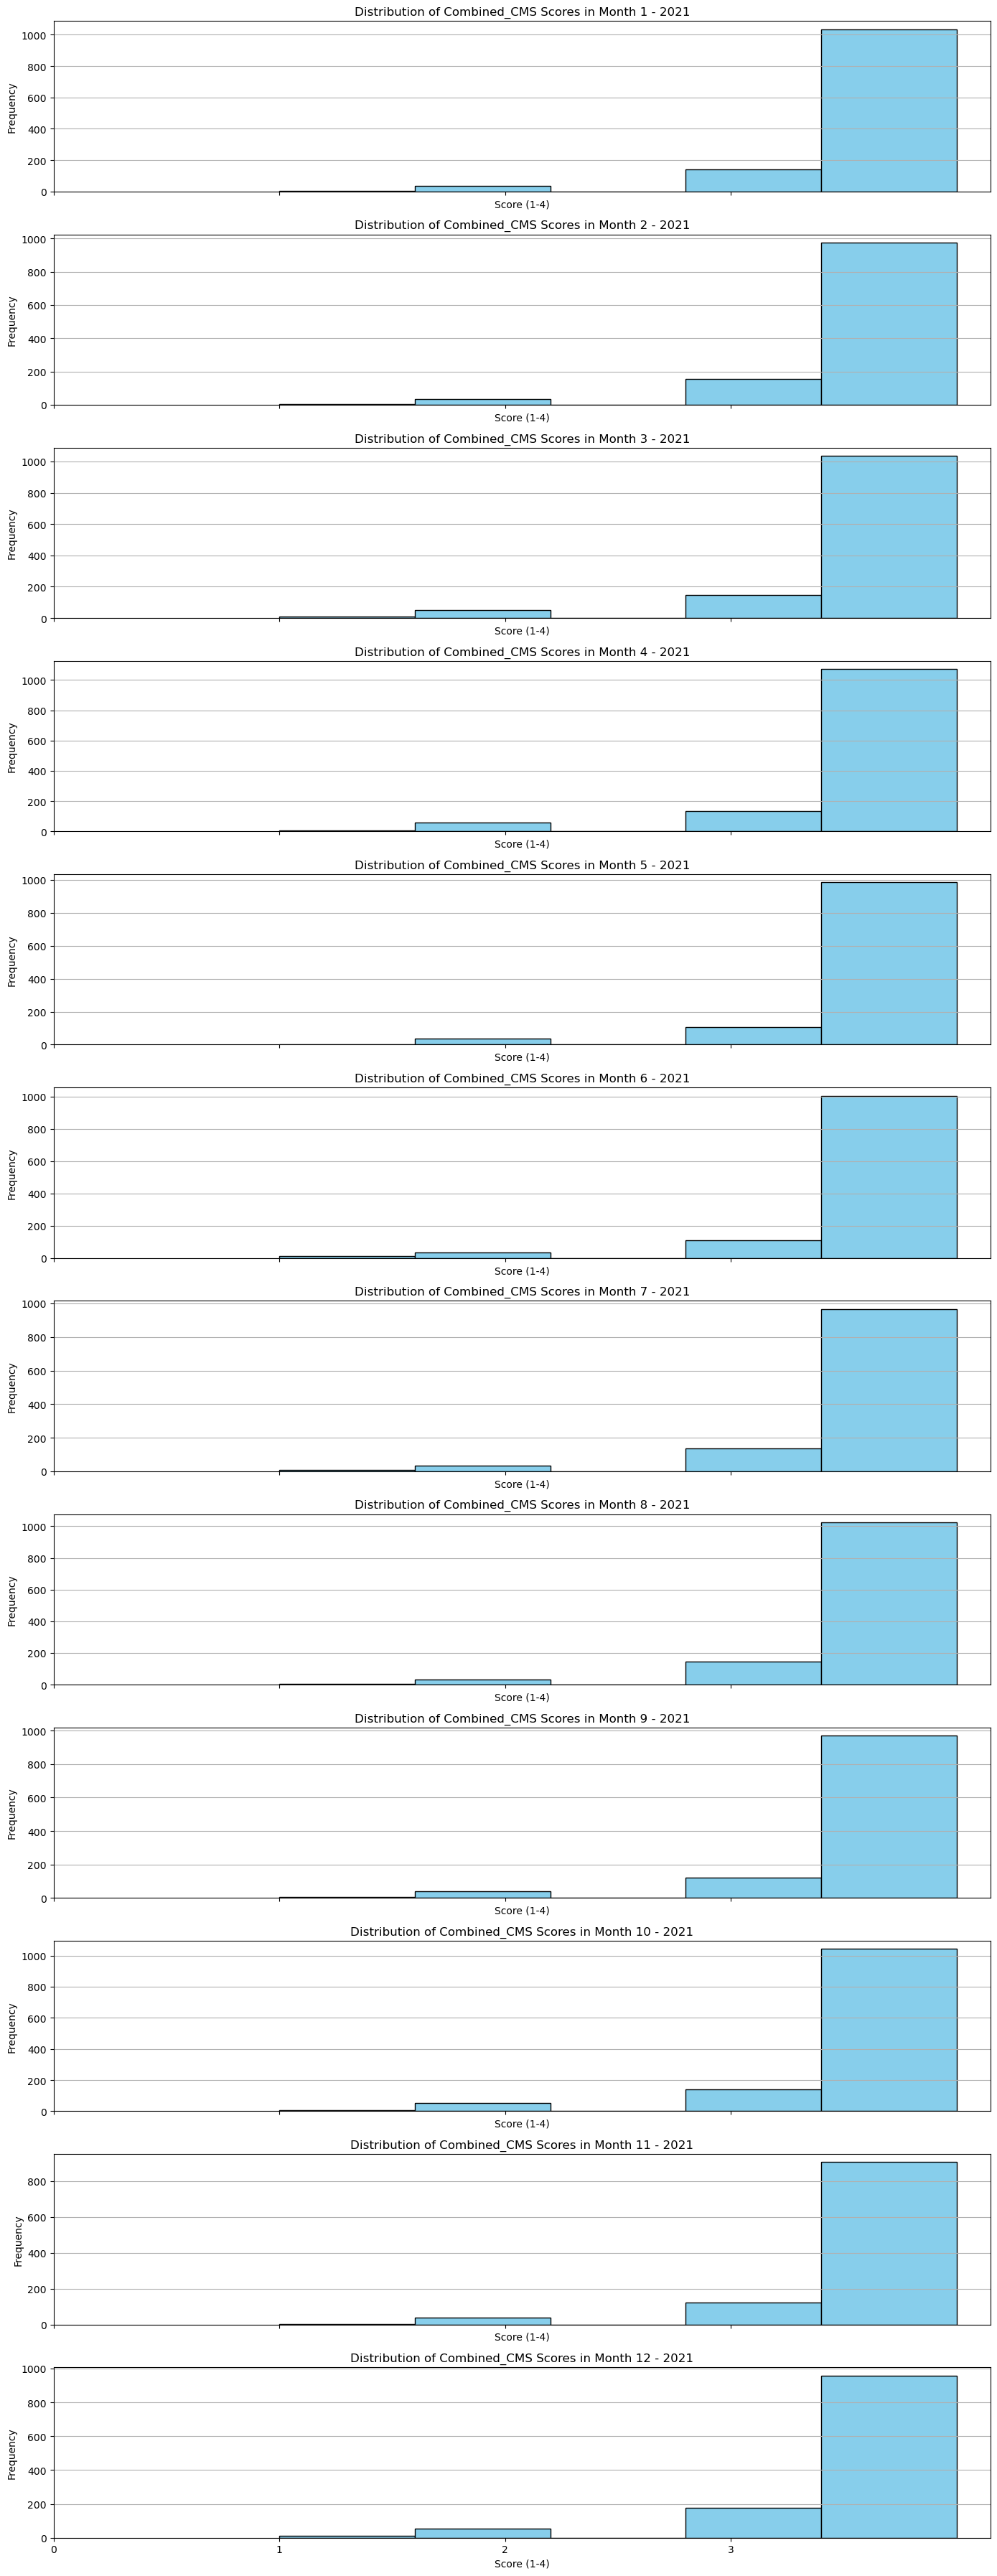

In [57]:
cahps_new['Year'] = cahps_new['DISDATE'].dt.year
cahps_new['Month'] = cahps_new['DISDATE'].dt.month

cahps_2021 = cahps_new[cahps_new['Year'] == 2021]

months = sorted(cahps_2021['Month'].dropna().unique())
num_months = len(months)

fig, axes = plt.subplots(num_months, 1, figsize=(14, num_months * 3), sharex=True)

for i, month in enumerate(months):
    monthly_data = cahps_2021[cahps_2021['Month'] == month]['Combined_CMS']
    axes[i].hist(monthly_data, bins=5, color='skyblue', edgecolor='black', range=(1, 4))
    axes[i].set_title(f'Distribution of Combined_CMS Scores in Month {int(month)} - 2021')
    axes[i].set_xlabel('Score (1-4)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(4))  
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\2909686903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Year'] = cahps_new['DISDATE'].dt.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\2909686903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Month'] = cahps_new['DISDATE'].dt.month


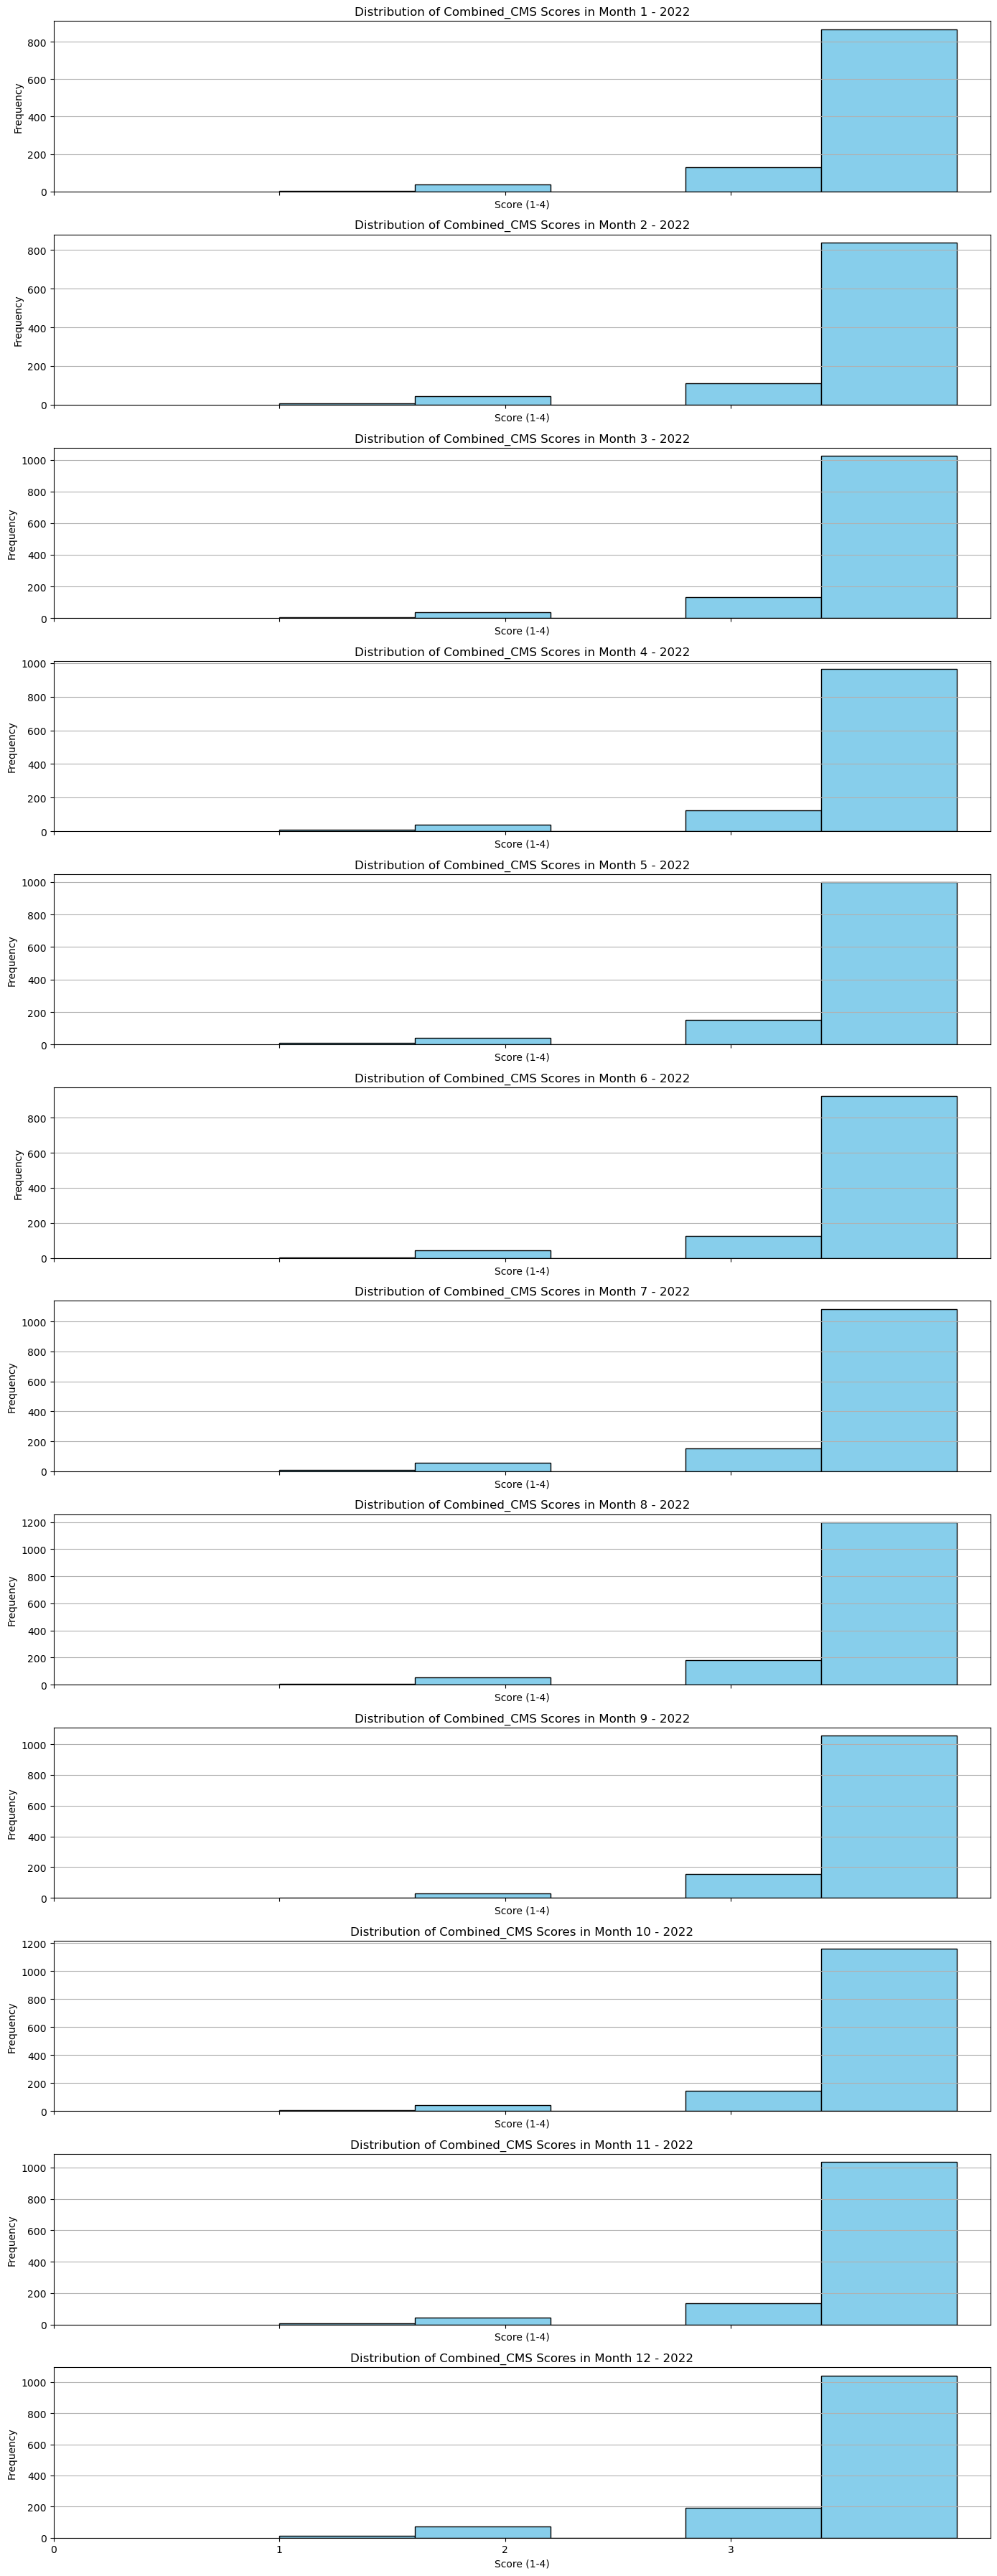

In [58]:
cahps_new['Year'] = cahps_new['DISDATE'].dt.year
cahps_new['Month'] = cahps_new['DISDATE'].dt.month

cahps_2022 = cahps_new[cahps_new['Year'] == 2022]

months = sorted(cahps_2022['Month'].dropna().unique())
num_months = len(months)

fig, axes = plt.subplots(num_months, 1, figsize=(14, num_months * 3), sharex=True)

for i, month in enumerate(months):
    monthly_data = cahps_2022[cahps_2022['Month'] == month]['Combined_CMS']
    axes[i].hist(monthly_data, bins=5, color='skyblue', edgecolor='black', range=(1, 4))
    axes[i].set_title(f'Distribution of Combined_CMS Scores in Month {int(month)} - 2022')
    axes[i].set_xlabel('Score (1-4)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(4))  
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\1984119305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Year'] = cahps_new['DISDATE'].dt.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\1984119305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Month'] = cahps_new['DISDATE'].dt.month


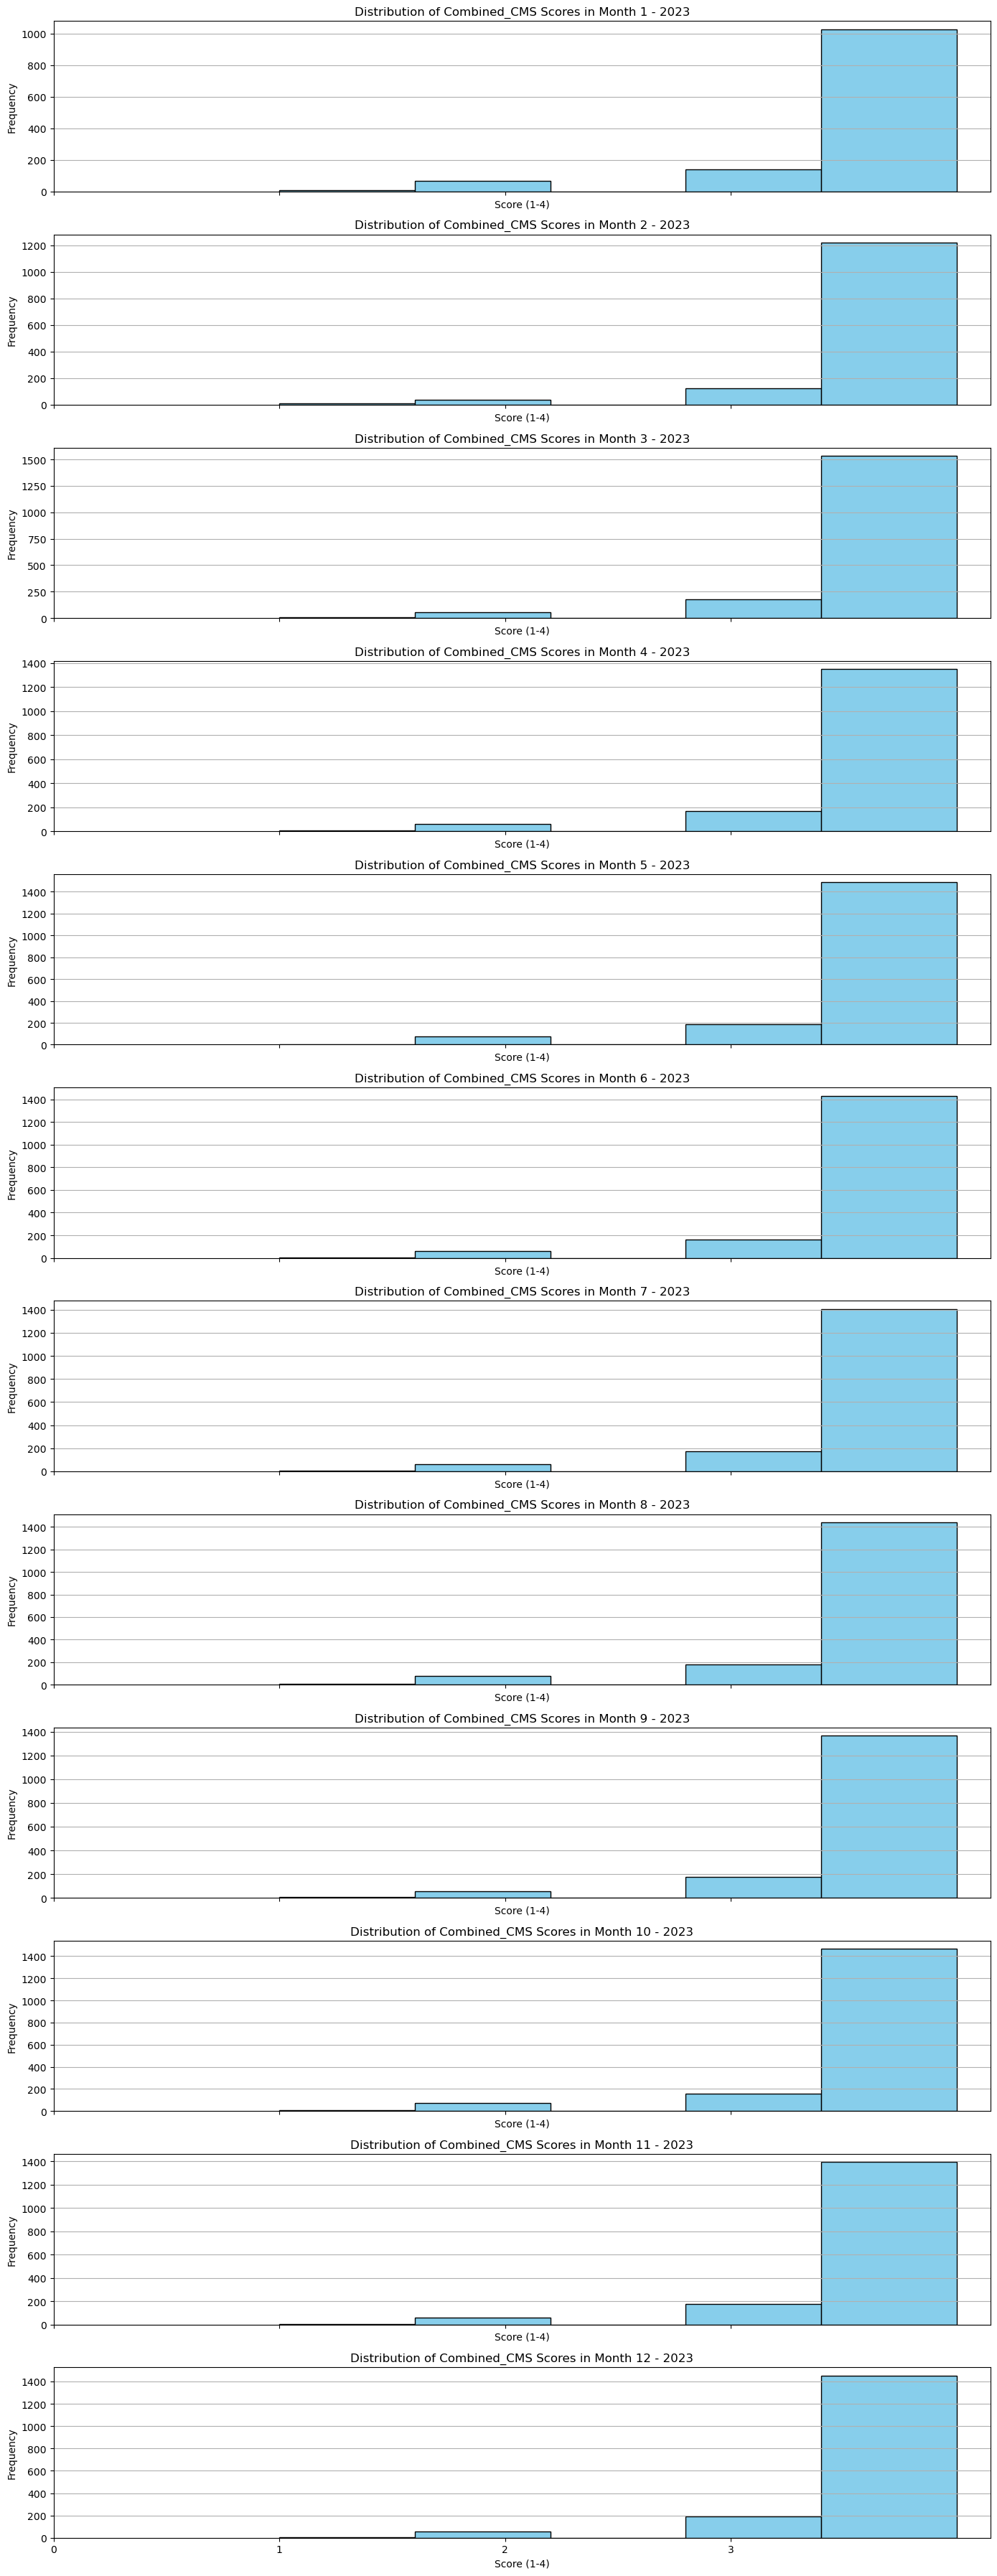

In [59]:
cahps_new['Year'] = cahps_new['DISDATE'].dt.year
cahps_new['Month'] = cahps_new['DISDATE'].dt.month

cahps_2023 = cahps_new[cahps_new['Year'] == 2023]

months = sorted(cahps_2023['Month'].dropna().unique())
num_months = len(months)

fig, axes = plt.subplots(num_months, 1, figsize=(14, num_months * 3), sharex=True)

for i, month in enumerate(months):
    monthly_data = cahps_2023[cahps_2023['Month'] == month]['Combined_CMS']
    axes[i].hist(monthly_data, bins=5, color='skyblue', edgecolor='black', range=(1, 4))
    axes[i].set_title(f'Distribution of Combined_CMS Scores in Month {int(month)} - 2023')
    axes[i].set_xlabel('Score (1-4)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(4))  
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3048403078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Year'] = cahps_new['DISDATE'].dt.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\3048403078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['Month'] = cahps_new['DISDATE'].dt.month


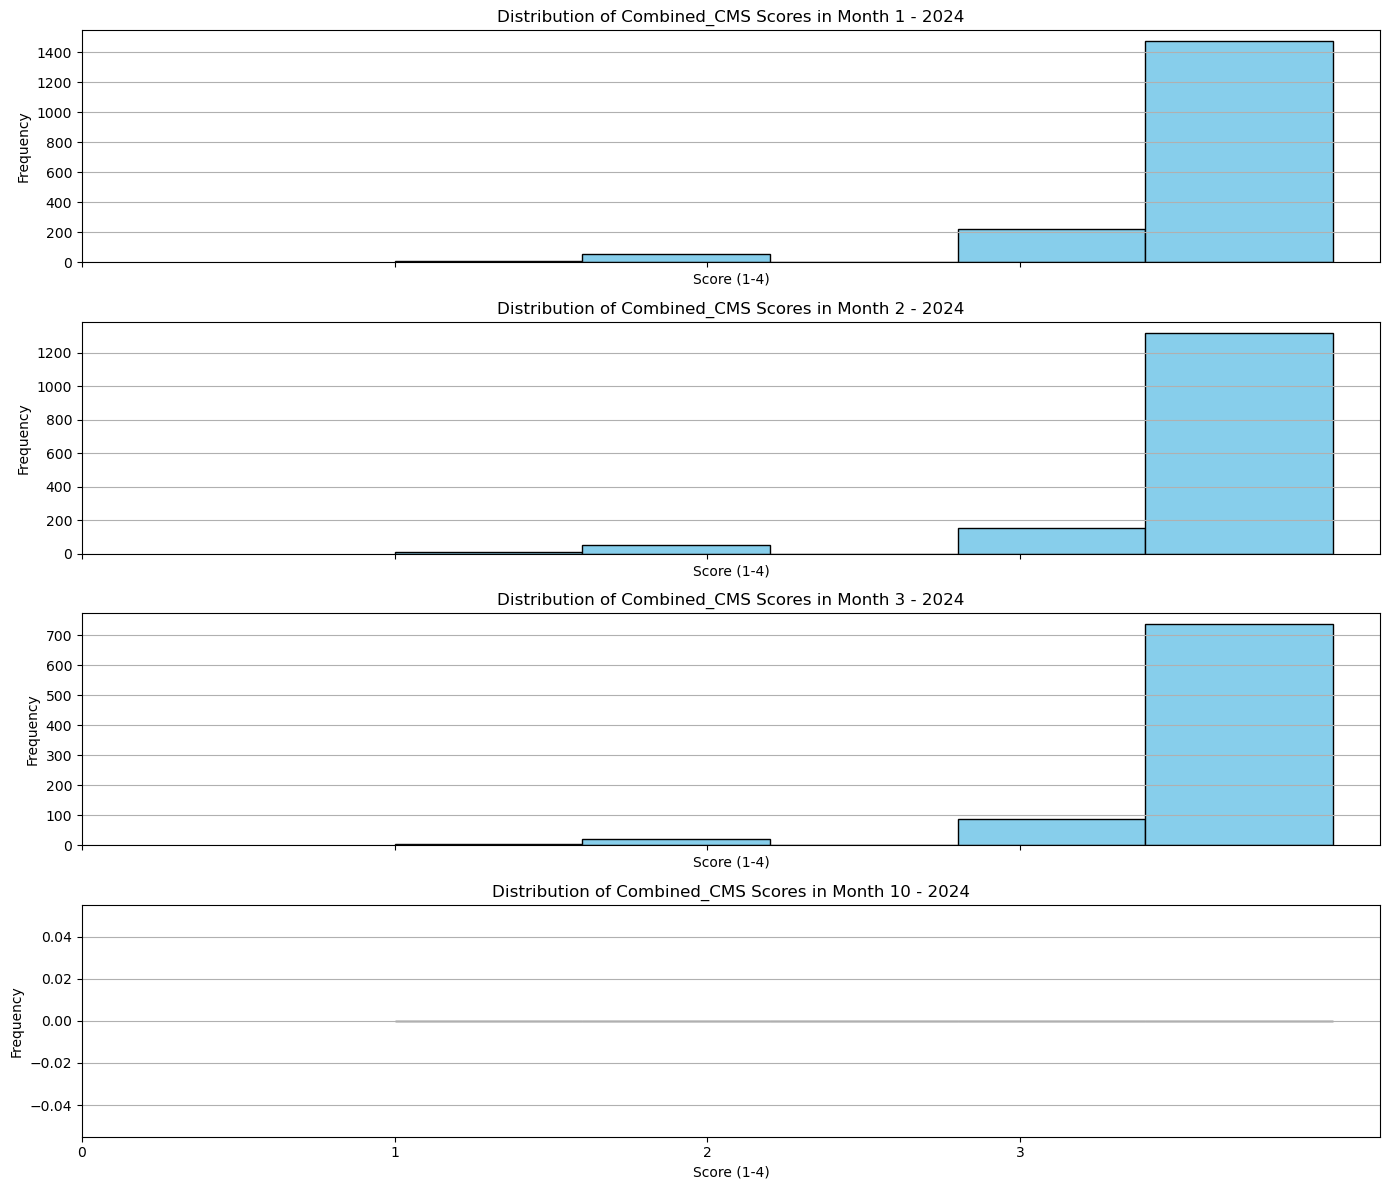

In [60]:
cahps_new['Year'] = cahps_new['DISDATE'].dt.year
cahps_new['Month'] = cahps_new['DISDATE'].dt.month

cahps_2024 = cahps_new[cahps_new['Year'] == 2024]

months = sorted(cahps_2024['Month'].dropna().unique())
num_months = len(months)

fig, axes = plt.subplots(num_months, 1, figsize=(14, num_months * 3), sharex=True)

for i, month in enumerate(months):
    monthly_data = cahps_2024[cahps_2024['Month'] == month]['Combined_CMS']
    axes[i].hist(monthly_data, bins=5, color='skyblue', edgecolor='black', range=(1, 4))
    axes[i].set_title(f'Distribution of Combined_CMS Scores in Month {int(month)} - 2024')
    axes[i].set_xlabel('Score (1-4)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(4))  
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

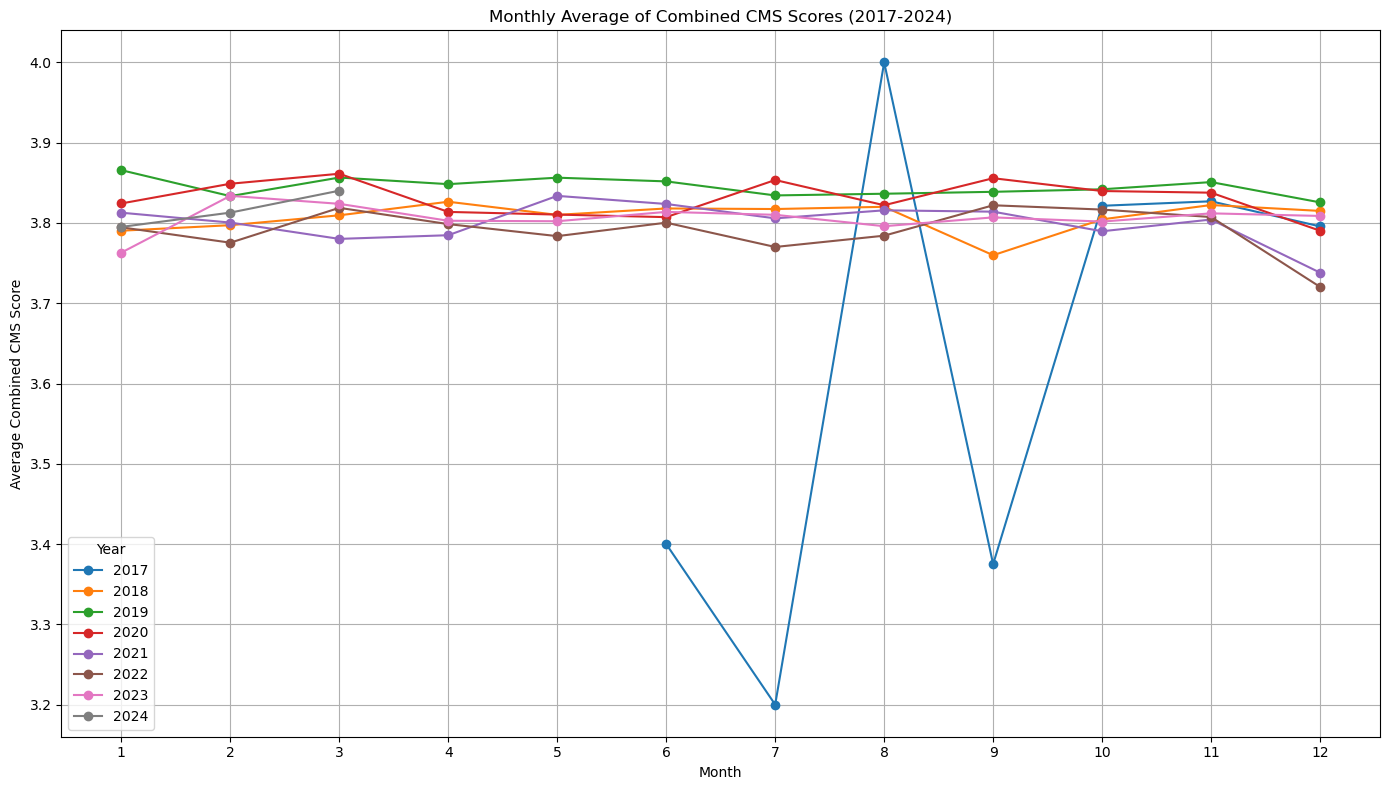

In [61]:
#Filter the DataFrame to include only data from 2017 to 2024
cahps_new_filtered = cahps_new[(cahps_new['DISDATE'].dt.year >= 2017) & (cahps_new['DISDATE'].dt.year <= 2024)]

#Extract year and month from 'DISDATE'
cahps_new_filtered['Year'] = cahps_new_filtered['DISDATE'].dt.year
cahps_new_filtered['Month'] = cahps_new_filtered['DISDATE'].dt.month

#Group by year and month and calculate the mean 'combined_cms' for each group
monthly_mean_cms = cahps_new_filtered.groupby(['Year', 'Month'])['Combined_CMS'].mean().reset_index()

#Pivot the table to have months as index and years as columns
pivot_table = monthly_mean_cms.pivot(index='Month', columns='Year', values='Combined_CMS')

#Plot the data
plt.figure(figsize=(14, 8))
for year in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[year], marker='o', label=str(year))

plt.title('Monthly Average of Combined CMS Scores (2017-2024)')
plt.xlabel('Month')
plt.ylabel('Average Combined CMS Score')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13))  #Ensure x-axis only shows months from 1 to 12
plt.tight_layout()
plt.show()


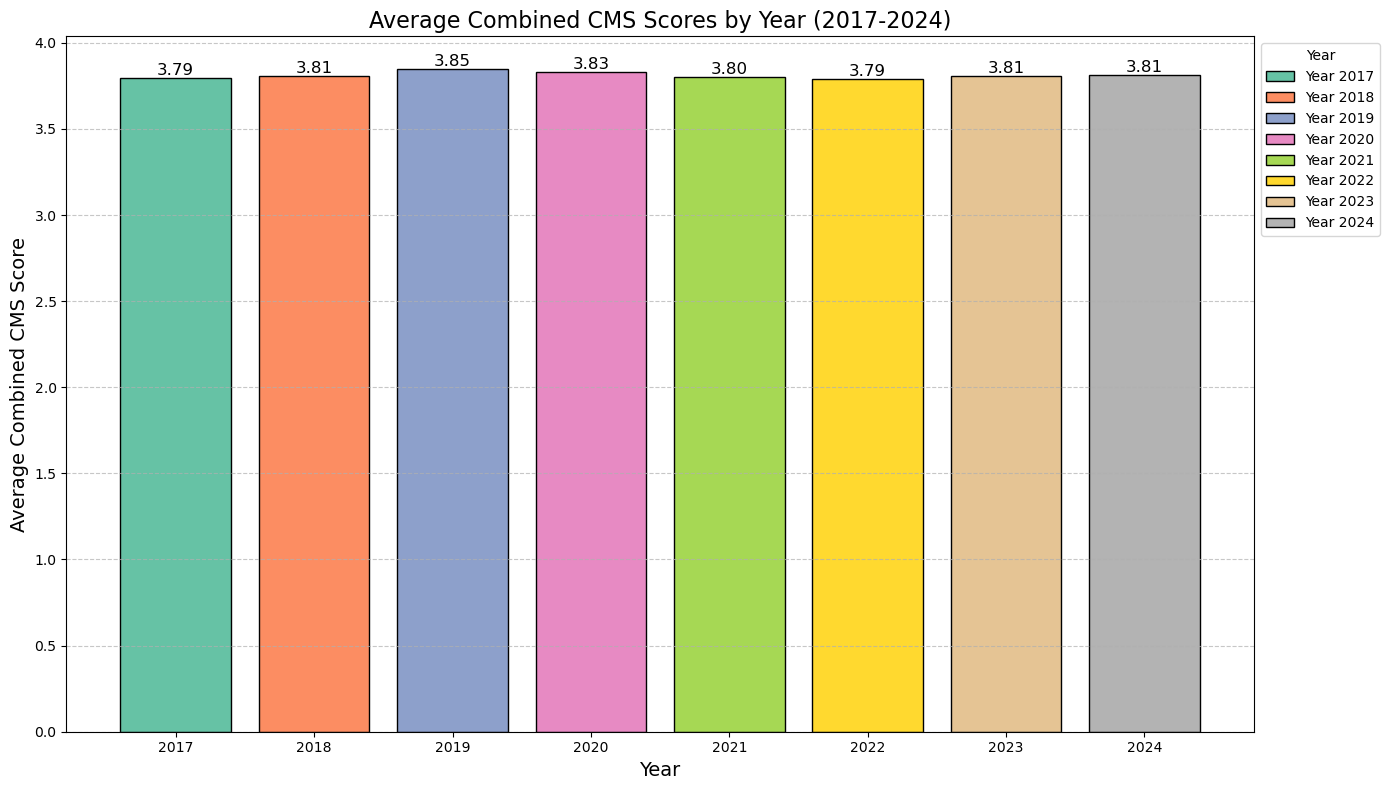

In [62]:
import seaborn as sns #Needed for color scheme

#Filter the DataFrame to include only data from 2017 to 2024
cahps_new_filtered = cahps_new[(cahps_new['DISDATE'].dt.year >= 2017) & (cahps_new['DISDATE'].dt.year <= 2024)]

#Extract year from 'DISDATE'
cahps_new_filtered['Year'] = cahps_new_filtered['DISDATE'].dt.year

#Group by year and calculate the mean 'Combined_CMS' for each year
yearly_mean_cms = cahps_new_filtered.groupby('Year')['Combined_CMS'].mean().reset_index()

#Generate colors 
colors = sns.color_palette("Set2", len(yearly_mean_cms))

#Plotting graph
plt.figure(figsize=(14, 8))
bars = plt.bar(yearly_mean_cms['Year'].astype(str), yearly_mean_cms['Combined_CMS'], color=colors, edgecolor='black')
plt.title('Average Combined CMS Scores by Year (2017-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Combined CMS Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Adding data labels on top of each bar
for bar, label in zip(bars, yearly_mean_cms['Combined_CMS']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}', ha='center', va='bottom', fontsize=12)

#Adding a legend
legend_labels = [f'Year {year}' for year in yearly_mean_cms['Year']]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title="Year")

plt.tight_layout()
plt.show()


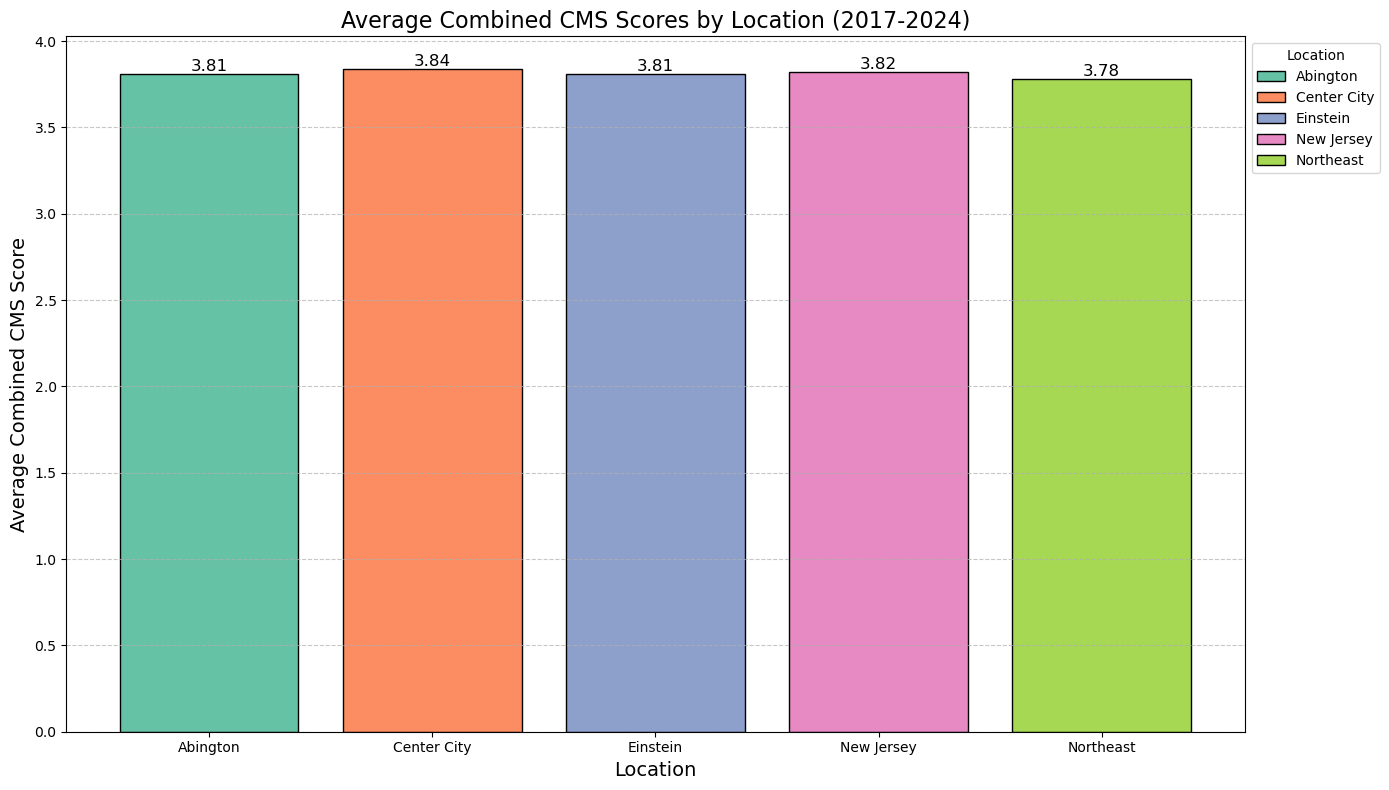

In [63]:
# Filter the DataFrame to include only data from 2017 to 2024
cahps_new_filtered = cahps_new[(cahps_new['DISDATE'].dt.year >= 2017) & (cahps_new['DISDATE'].dt.year <= 2024)]

#Calculate the mean 'Combined_CMS' for each 'GROUPER_1'
grouped_data = cahps_new_filtered.groupby('GROUPER_1')['Combined_CMS'].mean().reset_index()

#Generate colors 
colors = sns.color_palette("Set2", len(grouped_data))

#Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(grouped_data['GROUPER_1'], grouped_data['Combined_CMS'], color=colors, edgecolor='black')
plt.title('Average Combined CMS Scores by Location (2017-2024)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Combined CMS Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Adding a legend
legend_labels = grouped_data['GROUPER_1'].tolist()
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title="Location")

#Adding labels on top of each bar
for bar, label in zip(bars, grouped_data['Combined_CMS']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


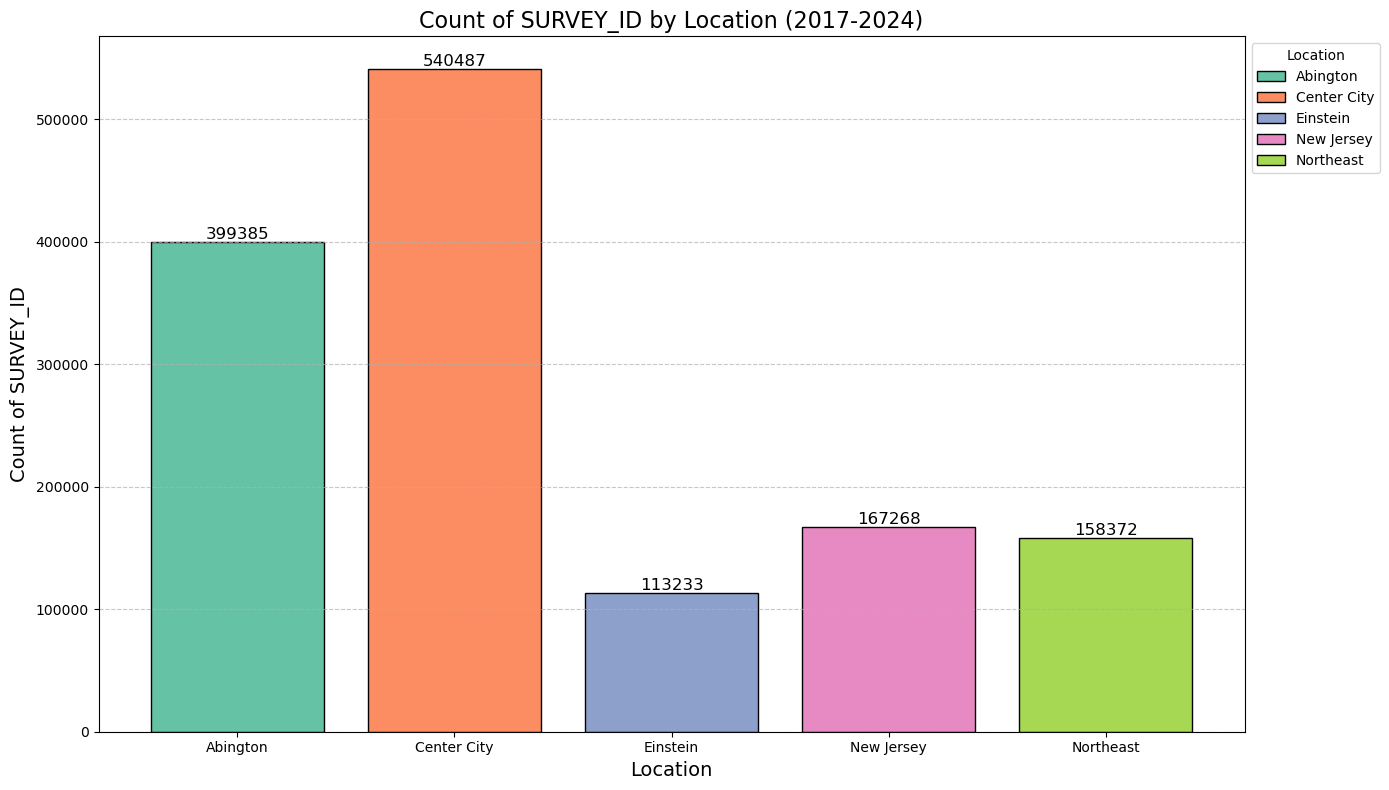

In [64]:
# Filter the DataFrame to include only data from 2017 to 2024
cahps_new_filtered = cahps_new[(cahps_new['DISDATE'].dt.year >= 2017) & (cahps_new['DISDATE'].dt.year <= 2024)]

#Group by 'GROUPER_1' and count the number of 'SURVEY_ID'
survey_counts = cahps_new_filtered.groupby('GROUPER_1')['SURVEY_ID'].count().reset_index()
survey_counts.columns = ['GROUPER_1', 'Count']

#Generate colors
colors = sns.color_palette("Set2", len(survey_counts))

#Plot
plt.figure(figsize=(14, 8))
bars = plt.bar(survey_counts['GROUPER_1'], survey_counts['Count'], color=colors, edgecolor='black')
plt.title('Count of SURVEY_ID by Location (2017-2024)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count of SURVEY_ID', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


legend_labels = survey_counts['GROUPER_1'].tolist()
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title="Location")


for bar, label in zip(bars, survey_counts['Count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


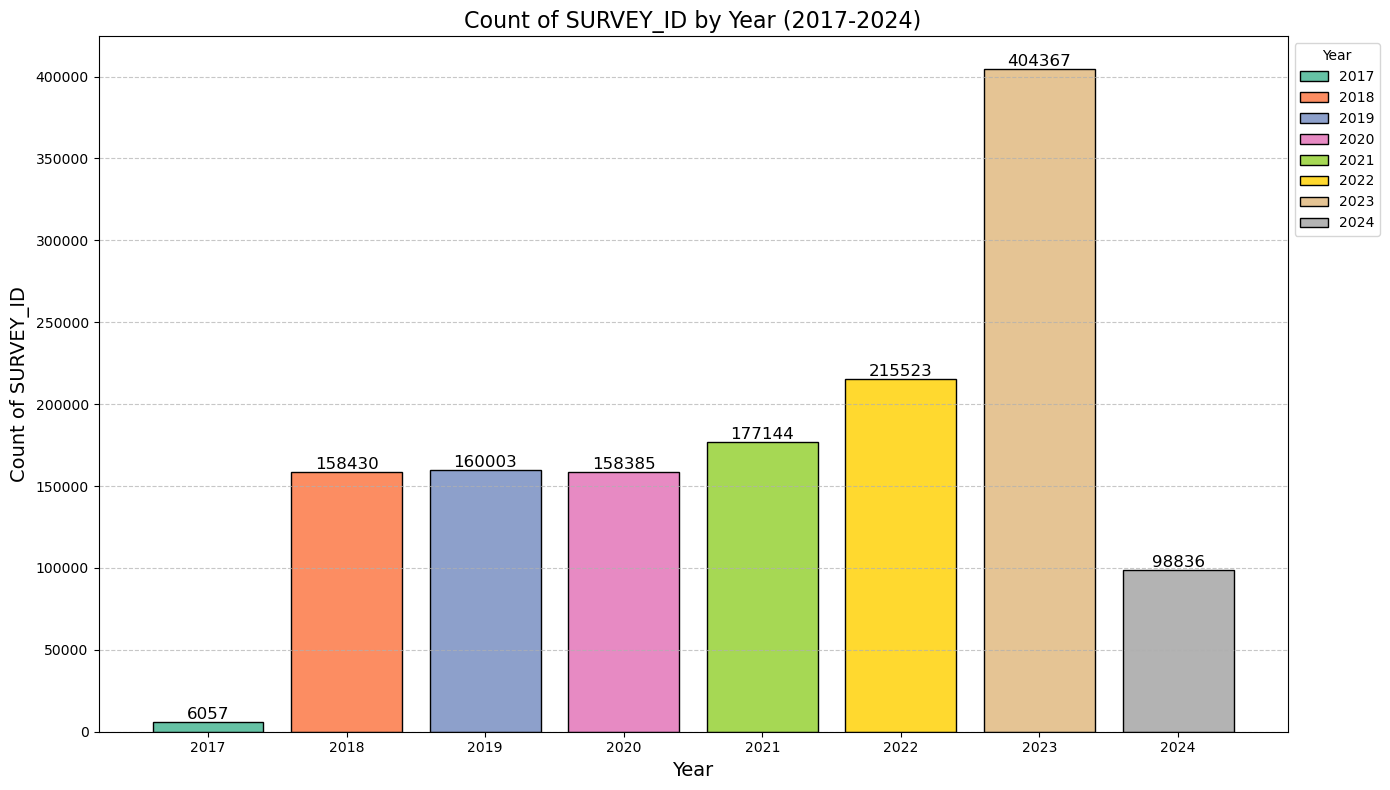

In [65]:
#Filter the DataFrame to include only data from 2017 to 2024
cahps_new_filtered = cahps_new[(cahps_new['DISDATE'].dt.year >= 2017) & (cahps_new['DISDATE'].dt.year <= 2024)]

#Extract year from 'DISDATE'
cahps_new_filtered['Year'] = cahps_new_filtered['DISDATE'].dt.year

#Group by year and count the number of 'SURVEY_ID'
survey_counts_by_year = cahps_new_filtered.groupby('Year')['SURVEY_ID'].count().reset_index()
survey_counts_by_year.columns = ['Year', 'Count']

#Generate colors for each bar using the Set2 palette
colors = sns.color_palette("Set2", len(survey_counts_by_year))

#Plot the data
plt.figure(figsize=(14, 8))
bars = plt.bar(survey_counts_by_year['Year'].astype(str), survey_counts_by_year['Count'], color=colors, edgecolor='black')
plt.title('Count of SURVEY_ID by Year (2017-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of SURVEY_ID', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Adding a legend
legend_labels = survey_counts_by_year['Year'].astype(str).tolist()
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title="Year")

#Adding data labels on top of each bar
for bar, label in zip(bars, survey_counts_by_year['Count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [66]:
import statsmodels.api as sm

#Set the DISDATE column as the index
cahps_new.set_index('DISDATE', inplace=True)

# Ensure data is sorted by DISDATE
cahps_new.sort_index(inplace=True)

#Extract year and month
cahps_new['year'] = cahps_new.index.year
cahps_new['month'] = cahps_new.index.month

#Drop rows where 'Combined_CMS' is NaN
cahps_new.dropna(subset=['Combined_CMS'], inplace=True)

#Define the target and features
y = cahps_new['Combined_CMS']
X = cahps_new[['year', 'month']]

#Add a constant to the model (intercept)
X = sm.add_constant(X)

#Split data into training and test sets
train_size = int(len(cahps_new) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#Train the linear regression model
model = sm.OLS(y_train, X_train).fit()

#Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#Evaluate the model
mse_train = np.mean((y_train - y_pred_train) ** 2)
mse_test = np.mean((y_test - y_pred_test) ** 2)

print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')



C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\1514188903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new.sort_index(inplace=True)
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\1514188903.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahps_new['year'] = cahps_new.index.year
C:\Users\khan2\AppData\Local\Temp\ipykernel_19656\1514188903.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Train MSE: 0.24540751375175343
Test MSE: 0.25569757432602164


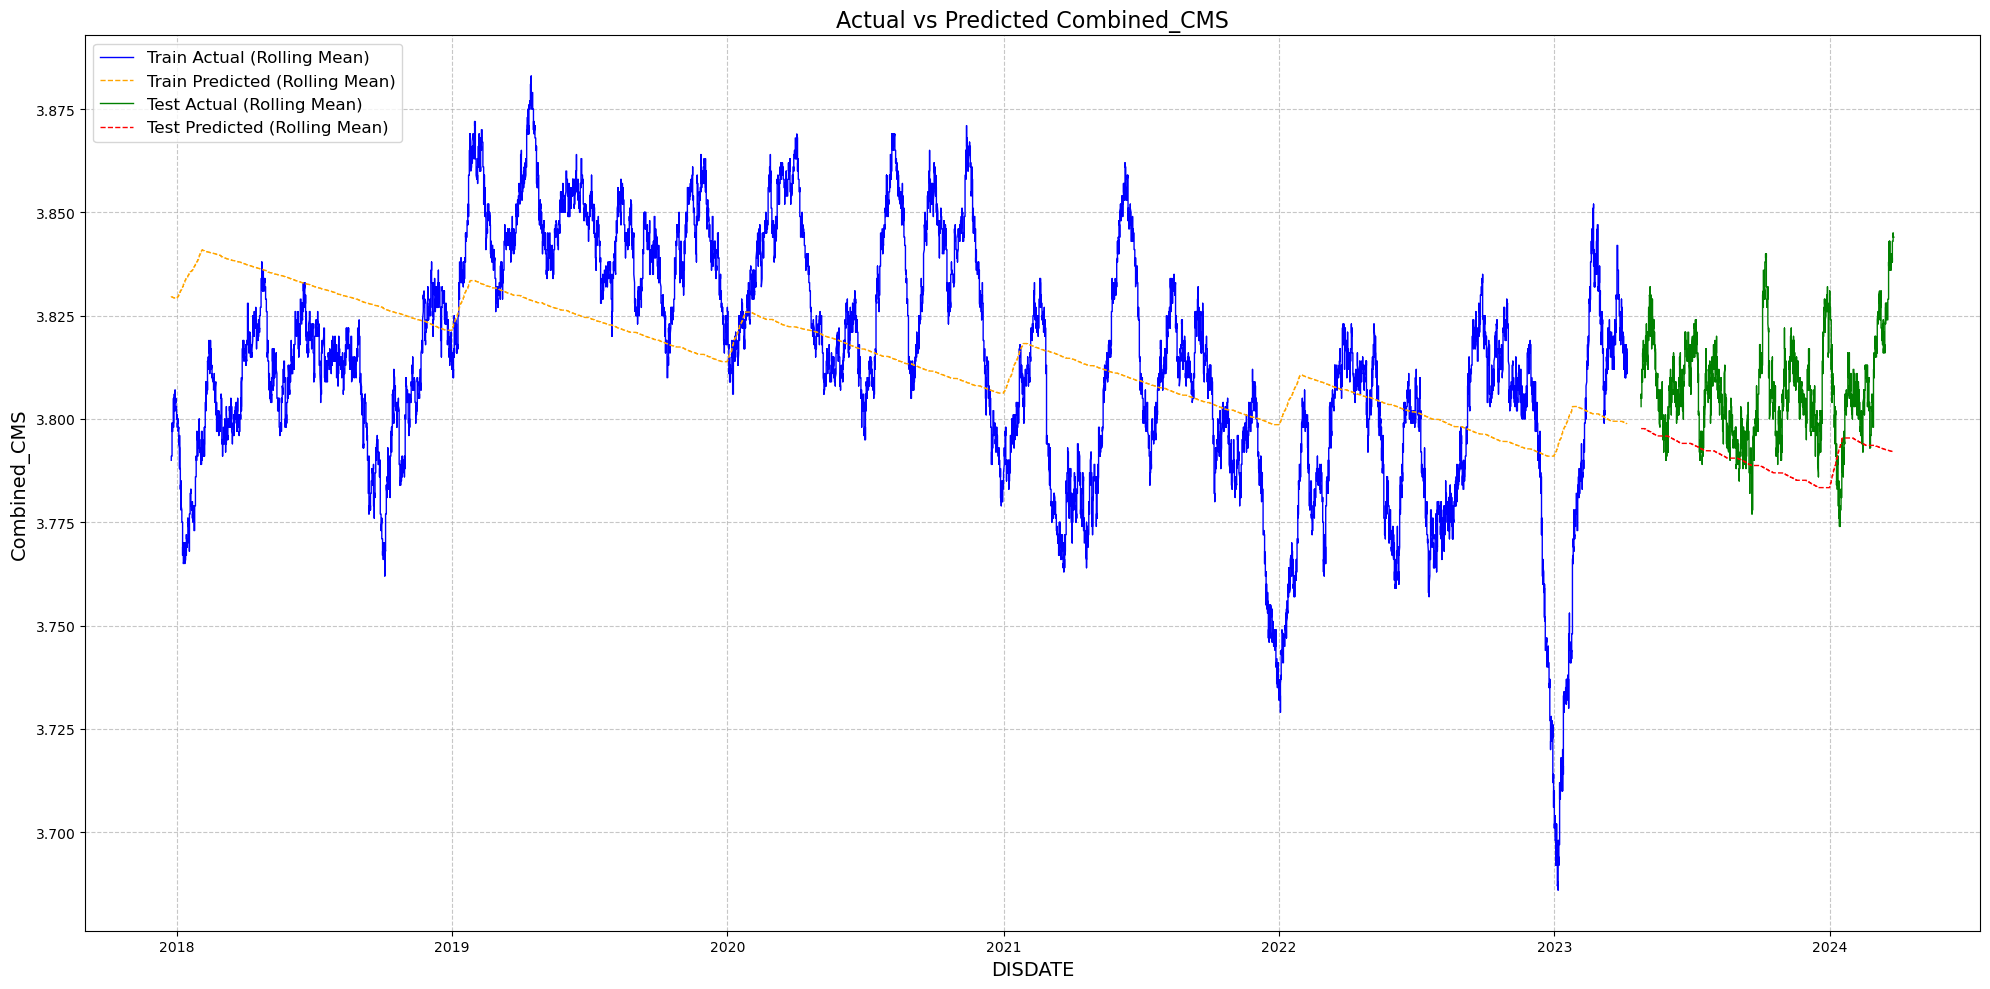

In [67]:
window_size = 1000  #Change the window size for better view

plt.figure(figsize=(20, 10))
plt.plot(cahps_new.index[:train_size], y_train.rolling(window=window_size).mean(), label='Train Actual (Rolling Mean)', linewidth=1, color='blue')
plt.plot(cahps_new.index[:train_size], y_pred_train.rolling(window=window_size).mean(), label='Train Predicted (Rolling Mean)', linestyle='--', linewidth=1, color='orange')
plt.plot(cahps_new.index[train_size:], y_test.rolling(window=window_size).mean(), label='Test Actual (Rolling Mean)', linewidth=1, color='green')
plt.plot(cahps_new.index[train_size:], y_pred_test.rolling(window=window_size).mean(), label='Test Predicted (Rolling Mean)', linestyle='--', linewidth=1, color='red')
plt.xlabel('DISDATE', fontsize=14)
plt.ylabel('Combined_CMS', fontsize=14)
plt.title('Actual vs Predicted Combined_CMS', fontsize=16)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()